**READING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('all_calls_2022-20234.csv')
mobility= pd.read_csv('Mobility.csv', delimiter = ';')
pop_dens= pd.read_csv('pop_dens.csv', delimiter = ';')
cars= pd.read_csv('Traffic.csv', delimiter = ';')

#Read holiday data  for 2022, 2023 and 2024
holidays_2022 = pd.read_csv('Holidays_2022.csv')
holidays_2023 = pd.read_csv('Holidays_2023.csv')
holidays_2024 = pd.read_csv('Holidays_2024.csv')

dict_1= {'PV22':'Drenthe', 'PV23':'Overijssel', 'PV24':'Flevoland', 'PV25':'Gelderland', 'PV26':'Utrecht','PV27':'Noord-Holland', 'PV28':'Zuid-Holland','PV30':'Noord-Brabant', 'PV31':'Limburg'}
dict_1

dict_2= {
 'Alkmaar': 'Noord-Holland',
 'Almere': 'Flevoland',
 'Amersfoort': 'Utrecht',
 'Amstelveen': 'Noord-Holland',
 'Amsterdam': 'Noord-Holland',
 'Arnhem': 'Gelderland',
 'Assen': 'Drenthe',
 'Breda': 'Noord-Brabant',
 'Bussum': 'Noord-Holland',
 'Deventer': 'Overijssel',
 'Delft': 'Zuid-Holland',
 'Den Haag': 'Zuid-Holland',
 'Den Helder': 'Noord-Holland',
 'Eindhoven': 'Noord-Brabant',
 'Hengelo': 'Overijssel',
 'Hoofddorp': 'Noord-Holland',
 'Hoorn': 'Noord-Holland',
 'IJsselstein': 'Utrecht',
 'Katwijk': 'Zuid-Holland',
 'Leiden': 'Zuid-Holland',
 'Maastricht': 'Limburg',
 'Nijmegen': 'Gelderland',
 'Nootdorp': 'Zuid-Holland',
 'Oosterhout': 'Noord-Brabant',
 'Pijnacker': 'Zuid-Holland',
 'Purmerend': 'Noord-Holland',
 'Roermond': 'Limburg',
 'Rotterdam': 'Zuid-Holland',
 'Tilburg': 'Noord-Brabant',
 'Utrecht': 'Utrecht',
 'Valkenburg': 'Limburg',
 'Veenendaal': 'Utrecht',
 'Veldhoven': 'Noord-Brabant',
 'Venray': 'Limburg',
 'Weert': 'Limburg',
 'Zaandam': 'Noord-Holland'
}

# Map 'City' to 'region_names' using 'dict_2'
df['region_names'] = df['City'].map(dict_2)

C:\Users\Kays\AppData\Local\Temp\ipykernel_59828\2654942134.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_calls_2022-20234.csv')


**CLEANING DATA**

In [2]:
#drop rows with missing region names
df = df.dropna(subset=['region_names'])
pop_dens['Perioden'].unique()
#replace 2022JJ00 with 2023JJ00
pop_dens['Perioden'] = pop_dens['Perioden'].replace('2022JJ00', '2023JJ00')
# population data 
pop_dens['RegioS'] = pop_dens['RegioS'].str.strip()
pop_dens['region_names'] = pop_dens['RegioS'].map(dict_1)

# cars data
cars['RegioS'] = cars['RegioS'].str.strip() 
cars['region_names'] = cars['RegioS'].map(dict_1)

cars_recent = cars[cars['Perioden'] == '2023JJ00']


cars_recent = cars_recent.drop('ID',axis=1) 
cars_recent = cars_recent.drop('RegioS',axis=1) 
cars_recent.rename(columns={'TotaalPersonenautoS_3': 'cars_per_region'}, inplace=True) 
cars_recent.rename(columns={'PersonenautoSRelatief_4': 'cars_per_region_1000'}, inplace=True)
mobility['RegionCharacteristics'] = mobility['RegionCharacteristics'].str.strip() #remove whitespace from the column

# Map 'RegionCharacteristics' to 'region_names' using 'dict_1'
mobility['region_names'] = mobility['RegionCharacteristics'].map(dict_1)
#replace 2022JJ00 with 2023JJ00
mobility['Periods'] = mobility['Periods'].replace('2022JJ00', '2023JJ00')

#subset only 2023 data
mobility = mobility[mobility['Periods'] == '2023JJ00']

# Drop unnecessary columns
columns_to_drop = ['ID', 'TravelMotives', 'Population', 'Margins',
                   'RegionCharacteristics', 'Periods', 'TravelModes',
                   'Trips_1', 'Trips_4', 'DistanceTravelled_2',
                   'TimeTravelled_3', 'TimeTravelled_6']
mobility.drop(columns_to_drop, axis=1, inplace=True)

# Clean up 'DistanceTravelled_5' and convert commas to periods
mobility['DistanceTravelled_5'] = mobility['DistanceTravelled_5'].str.strip().replace(',', '.')

# Convert 'DistanceTravelled_5' to numeric, coercing errors to NaN
pd.to_numeric(mobility['DistanceTravelled_5'], errors='coerce')

print(mobility['region_names'].duplicated().sum())
print(cars_recent['region_names'].duplicated().sum())
print(pop_dens['region_names'].duplicated().sum())
#keep the first occurence of the duplicated region_names
mobility = mobility.drop_duplicates(subset=['region_names'])

1071
0
0


In [3]:
#merge with population density
df2 = df.merge(pop_dens, on ='region_names' , how= 'left')
 # use formula to merge 3 dfs at the same time for the same columns
#merge with mobility
df3 = df2.merge(mobility, on ='region_names' , how='left')
#merge with cars
df = df3.merge(cars_recent, on ='region_names' , how= 'inner')
#drop RegioS_x and Perioden_x columns
df.drop(['Perioden_x', 'Perioden_y','Geslacht'], axis=1, inplace=True)

**MERGING DATA**

In [4]:
#rename Bevolkingsdichtheig to Population_Dens
df.rename(columns={'Bevolkingsdichtheid_2':'Population_Dens','region_names':'Region'}, inplace=True)
#Create new Date column from DateTime column in df
df['Date'] = pd.to_datetime(df['DateTime']).dt.date

#transform Datum column in holidays_2022, holidays_2023 and holidays_2024 to Date 
holidays_2022['Date'] = pd.to_datetime(holidays_2022['Datum']).dt.date

# Combine the dfs
holidays_all_years = pd.concat([holidays_2022, holidays_2023, holidays_2024])

# Convert the date column to datetime
holidays_all_years['Datum'] = pd.to_datetime(holidays_all_years['Date'])

#Merge the dataframes in new holiday column
df = df.merge(holidays_all_years, on=['Date'], how='left')



**CLEANING DATA SOME MORE**

In [5]:

# Convert 'ConversationTime' to timedelta and then to seconds, coercing errors
df['ConversationTime_Seconds'] = pd.to_timedelta(df['ConversationTime'], errors='coerce').dt.total_seconds()
df['WaitTime_Seconds'] = pd.to_timedelta(df['WaitTime'], errors='coerce').dt.total_seconds()

# Check for NaN values after conversion and fill w median
median_conversation_time = df['ConversationTime_Seconds'].median()
df['ConversationTime_Seconds'].fillna(median_conversation_time, inplace=True)

# Convert 'DateTime' to DateTime, coercing errors, this will turn the invalid dates to NaT and Datetime will contain only valid dates
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')


#exteract day of week from datetime
df['Day_of_Week'] = df['DateTime'].dt.day_name()
#extract hour of day
df['Hour_of_Day'] = df['DateTime'].dt.hour
#extract week
df['Week'] = df['DateTime'].dt.isocalendar().week
#extract year
df['Year'] = df['DateTime'].dt.year
#find NaTs in Waittime
df[df['WaitTime'].isnull()]

df['Facility'].unique()


# we need to remove rows with these facilities from facility column
df = df[~df['Facility'].isin(['Tilburg Pieter Vredeplein', 'Tilburg Emma passage', 'Tilburg Koningsplein','Leiden Garenmarkt','Tilburg Tivoli', 'Leiden Haarlemmerstraat', 'Tilburg Zwijssen','Tilburg Stappegoor','Tilburg Schouwburgplein', 'Leiden Soestdijkkade', 'Leiden Lammermarkt','Leiden Morspoort'])]
#check for uniques in operator column
df['Operator'].unique()

#drop rows with operators that are not representative of the operations in operator column
df = df[~df['Operator'].isin(['Administrator', 'Meldkamer Tilburg', 'flex','m.elvery','test','-'])] # ~ means not

#anonimize operator column by encoding to Operator 1, Operator 2, Operator 3 in new column
df['Operator_ID'] = df['Operator'].astype('category').cat.codes
#replace operator -1 with nan
df['Operator_ID'] = df['Operator_ID'].replace(-1, np.nan)
#drop nan rows
df = df.dropna(subset=['Operator_ID'])

# Display the first few rows to confirm the changes
df['Operator'].head()
# Create a separate DataFrame with operator ID and operator name without duplicates
operator_df = df[['Operator_ID', 'Operator', 'Desk']].drop_duplicates().sort_values(by='Operator_ID')

# Replace -1 with NaN in the 'Operator_ID' column
operator_df['Operator_ID'] = operator_df['Operator_ID'].replace(-1, np.nan)
# turn nan values in flag column to '0'
df['Flag_BarrierOpened'] = df['Flag_BarrierOpened'].fillna(0)
# Check for '-' entries and turn them to NaN
df = df.replace('-', np.nan)

# Check for null values in the dataset
df.isnull().sum()
#drop type column
df.drop(['Type'], axis=1, inplace=True)

#create new column for holidays
df['Holiday'] = np.where(df['Datum'].isnull(), 0, 1)

#drop Datum and feestdag column
df.drop(['Datum'], axis=1, inplace=True)
df.drop(['Feestdag'], axis=1, inplace=True)


#check the data
df.head()

,DateTime,City,Facility,Device,Desk,Operator,WaitTime,ConversationTime,Reason,ReasonEnteredByUser,...,cars_per_region_1000,Date,ConversationTime_Seconds,WaitTime_Seconds,Day_of_Week,Hour_of_Day,Week,Year,Operator_ID,Holiday
0,2023-07-15 06:02:52.727,Eindhoven,Eindhoven Veemgebouw,EI/VE/IN ABBO,9926,Qais Shirzai,02:05:34.870000,00:00:02.040000,No reason entered,NaN,...,553,2023-07-15,2.040,7534.870,Saturday,6,28,2023,17,0
1,2023-07-15 06:05:15.100,Breda,Breda De Prins,BR/DP/UIT-2,9926,Qais Shirzai,02:03:16.037000,00:00:01.633000,No reason entered,NaN,...,553,2023-07-15,1.633,7396.037,Saturday,6,28,2023,17,0
2,2023-07-15 06:10:21.567,Breda,Breda De Prins,BR/DP/BA-1,9926,Qais Shirzai,01:58:14.226000,00:00:01.030000,No reason entered,NaN,...,553,2023-07-15,1.030,7094.226,Saturday,6,28,2023,17,0
3,2023-07-15 06:10:19.817,Breda,Breda De Prins,BR/DP/BA-3,9926,Qais Shirzai,01:58:14.013000,00:00:01,No reason entered,NaN,...,553,2023-07-15,1.000,7094.013,Saturday,6,28,2023,17,0
4,2023-07-15 06:13:13.130,Breda,Breda De Prins,BR/DP/DL-2,9926,Qais Shirzai,01:55:24.383000,00:00:01.380000,No reason entered,NaN,...,553,2023-07-15,1.380,6924.383,Saturday,6,28,2023,17,0


**EDA**

In [6]:
# print all column names
for col in df.columns:
    print(col)

#find date range of the data
print(df['Date'].min())
print(df['Date'].max())



DateTime
City
Facility
Device
Desk
Operator
WaitTime
ConversationTime
Reason
ReasonEnteredByUser
Flag_MissedCall
Flag_NoCallReceived
Flag_BarrierOpened
Region
ID
RegioS
Population_Dens
DistanceTravelled_5
cars_per_region
cars_per_region_1000
Date
ConversationTime_Seconds
WaitTime_Seconds
Day_of_Week
Hour_of_Day
Week
Year
Operator_ID
Holiday
2022-11-27
2023-11-28


In [7]:
df['City'].unique()
#drop cities we dont need
df = df[~df['City'].isin(['Arnhem', 'Almere'])]
#find rows where city is nan
df[df['City'].isnull()]

#there are 100 rows where city is nan, we can drop them
df = df.dropna(subset=['City'])
df['Reason'].unique()

#count values in reason
df['Reason'].value_counts()

#operationally, Sometimes operators forget to click a reason for each call, especiallly during peak moments. Which is why there is a high number of calls with no reason.

Reason
No reason entered              218372
Kortparkeerder                  86658
Klant was al weg                32209
Overige                          5610
Abonnementhouder                 3728
Leverancier/Medewerker/ANWB      2723
Name: count, dtype: int64

In [8]:
#check for null values in desk column
df[df['Desk'].isnull()]

#remove rows with null values in desk column
df = df.dropna(subset=['Desk'])
#split the device column 
df['Device_Copy'] = df['Device'].copy() 
df['Last_Split'] = df['Device_Copy'].str.rsplit('/', n=1) 


# Expand the result into separate columns 
df[['Before_Last', 'Last']] = pd.DataFrame(df['Last_Split'].tolist(), index=df.index) 

# Drop the intermediate 'Last_Split' column 
df = df.drop(['Device', 'Last_Split'], axis=1) 

#Rename the columns 
df.rename(columns={'Before_Last':'City/Facility', 'Last':'Device'}, inplace=True) 


#drop device copy and city/facility columns  
df = df.drop(['Device_Copy'], axis=1) 
df = df.drop(['City/Facility'], axis=1) 

In [9]:
# Calculate IQR for 'WaitTime_Seconds'
Q1_wait = df['WaitTime_Seconds'].quantile(0.25)
Q3_wait = df['WaitTime_Seconds'].quantile(0.75)
IQR_wait = Q3_wait - Q1_wait

# Filter out data points with 'WaitTime_Seconds' exceeding the IQR threshold
f_df = df[(df['WaitTime_Seconds'] >= (Q1_wait - 1.5 * IQR_wait)) & (df['WaitTime_Seconds'] <= (Q3_wait + 1.5 * IQR_wait))]

#  calculate and filter 'ConversationTime_Seconds'
Q1_conversation = df['ConversationTime_Seconds'].quantile(0.25)
Q3_conversation = df['ConversationTime_Seconds'].quantile(0.75)
IQR_conversation = Q3_conversation - Q1_conversation

f_df = f_df[(f_df['ConversationTime_Seconds'] >= (Q1_conversation - 1.5 * IQR_conversation)) & (f_df['ConversationTime_Seconds'] <= (Q3_conversation + 1.5 * IQR_conversation))]

# Now 'f_df' contains your DataFrame with outliers removed


In [10]:

#replace nan values in flag column with 0
f_df['Flag_BarrierOpened'] = f_df['Flag_BarrierOpened'].fillna(0)
#convert data types
f_df['Operator_ID'] = f_df['Operator_ID'].astype(int)
f_df['Holiday'] = f_df['Holiday'].astype(int)
#f_df['Population_Dens'] = f_df['Population_Dens'].astype(int)

f_df['City'] = f_df['City'].astype('category')
f_df['Facility'] = f_df['Facility'].astype('category')
f_df['Reason'] = f_df['Reason'].astype('string')
#f_df['Region'] = f_df['Region'].astype('category')
f_df['Day_of_Week'] = f_df['Day_of_Week'].astype('category')
f_df['Hour_of_Day'] = f_df['Hour_of_Day'].astype('category')
f_df['Device'] = f_df['Device'].astype('string')
f_df['Flag_BarrierOpened'] = f_df['Flag_BarrierOpened'].astype(int)




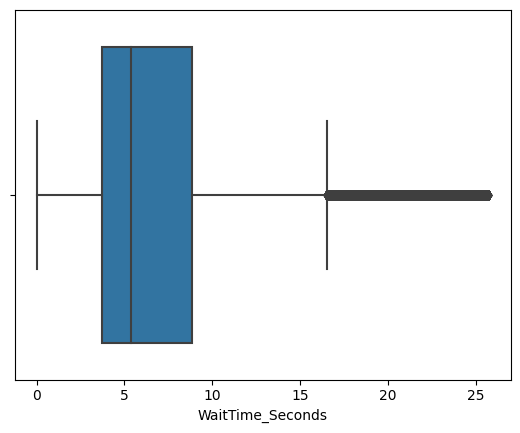

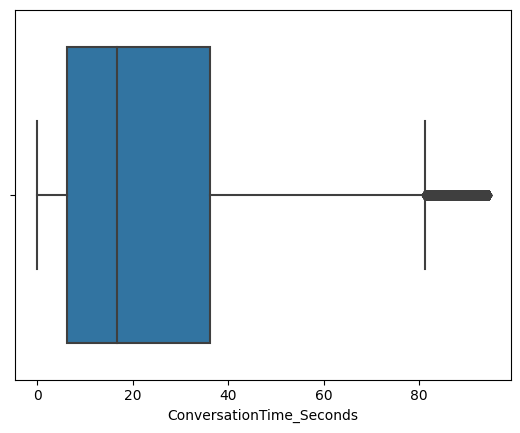

In [11]:
#boxplots to verify outliers removal
sns.boxplot(x=f_df['WaitTime_Seconds'])
plt.show()

sns.boxplot(x=f_df['ConversationTime_Seconds'])
plt.show()


c:\Users\Kays\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


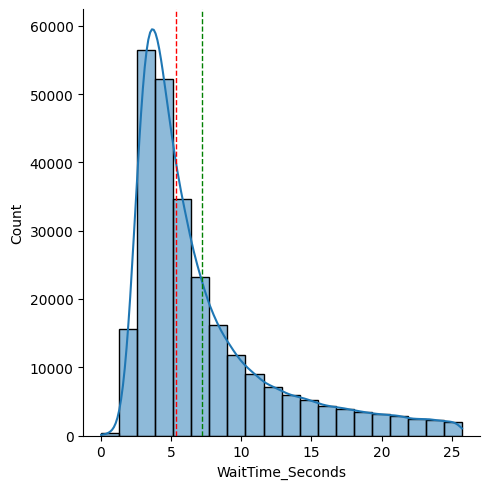

In [12]:
#CHECK distribution of WaitTime_Seconds
sns.displot(f_df['WaitTime_Seconds'], kde=True, bins=20)
#annotate median
plt.axvline(f_df['WaitTime_Seconds'].median(), color='r', linestyle='dashed', linewidth=1)
#annotate mean
plt.axvline(f_df['WaitTime_Seconds'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.show()

In [13]:
#create calls per day column
f_df['Calls_per_day'] = f_df.groupby('Date')['Date'].transform('count')

#calculate calls per day per facility
calls_per_day_facility = f_df.groupby(['Facility', 'Date'])['Facility'].count().reset_index(name='CallCount')

# Display the top three facilities with the highest average calls per day 
top_facilities = calls_per_day_facility.groupby('Facility')['CallCount'].mean().sort_values(ascending=False).head(5)
print(top_facilities)

# Group by Operator_ID and Hour_of_Day, then calculate the average wait time
avg_wait_per_hour_operator = f_df.groupby(['Operator_ID', 'Hour_of_Day'])['WaitTime_Seconds'].mean().reset_index(name='AverageWaitTime')

# Calculate the number of days
num_days = f_df['Date'].nunique()

# Calculate the average wait time per hour for each operator
# The number of days is used to average over different days
avg_wait_per_hour_operator['AverageWaitTimePerDay'] = avg_wait_per_hour_operator['AverageWaitTime'] / num_days
avg_wait_per_hour_operator = avg_wait_per_hour_operator[['Operator_ID', 'Hour_of_Day', 'AverageWaitTimePerDay']]

# Now, avg_wait_per_hour_operator contains the average wait time per day for each hour for each operator


Facility
Eindhoven Terminal M (Meerhoven)    32.378747
Amsterdam Houthaven                 30.332425
Breda De Barones                    26.836512
Amsterdam De Overkant               23.645777
Breda De Prins                      22.738420
Name: CallCount, dtype: float64


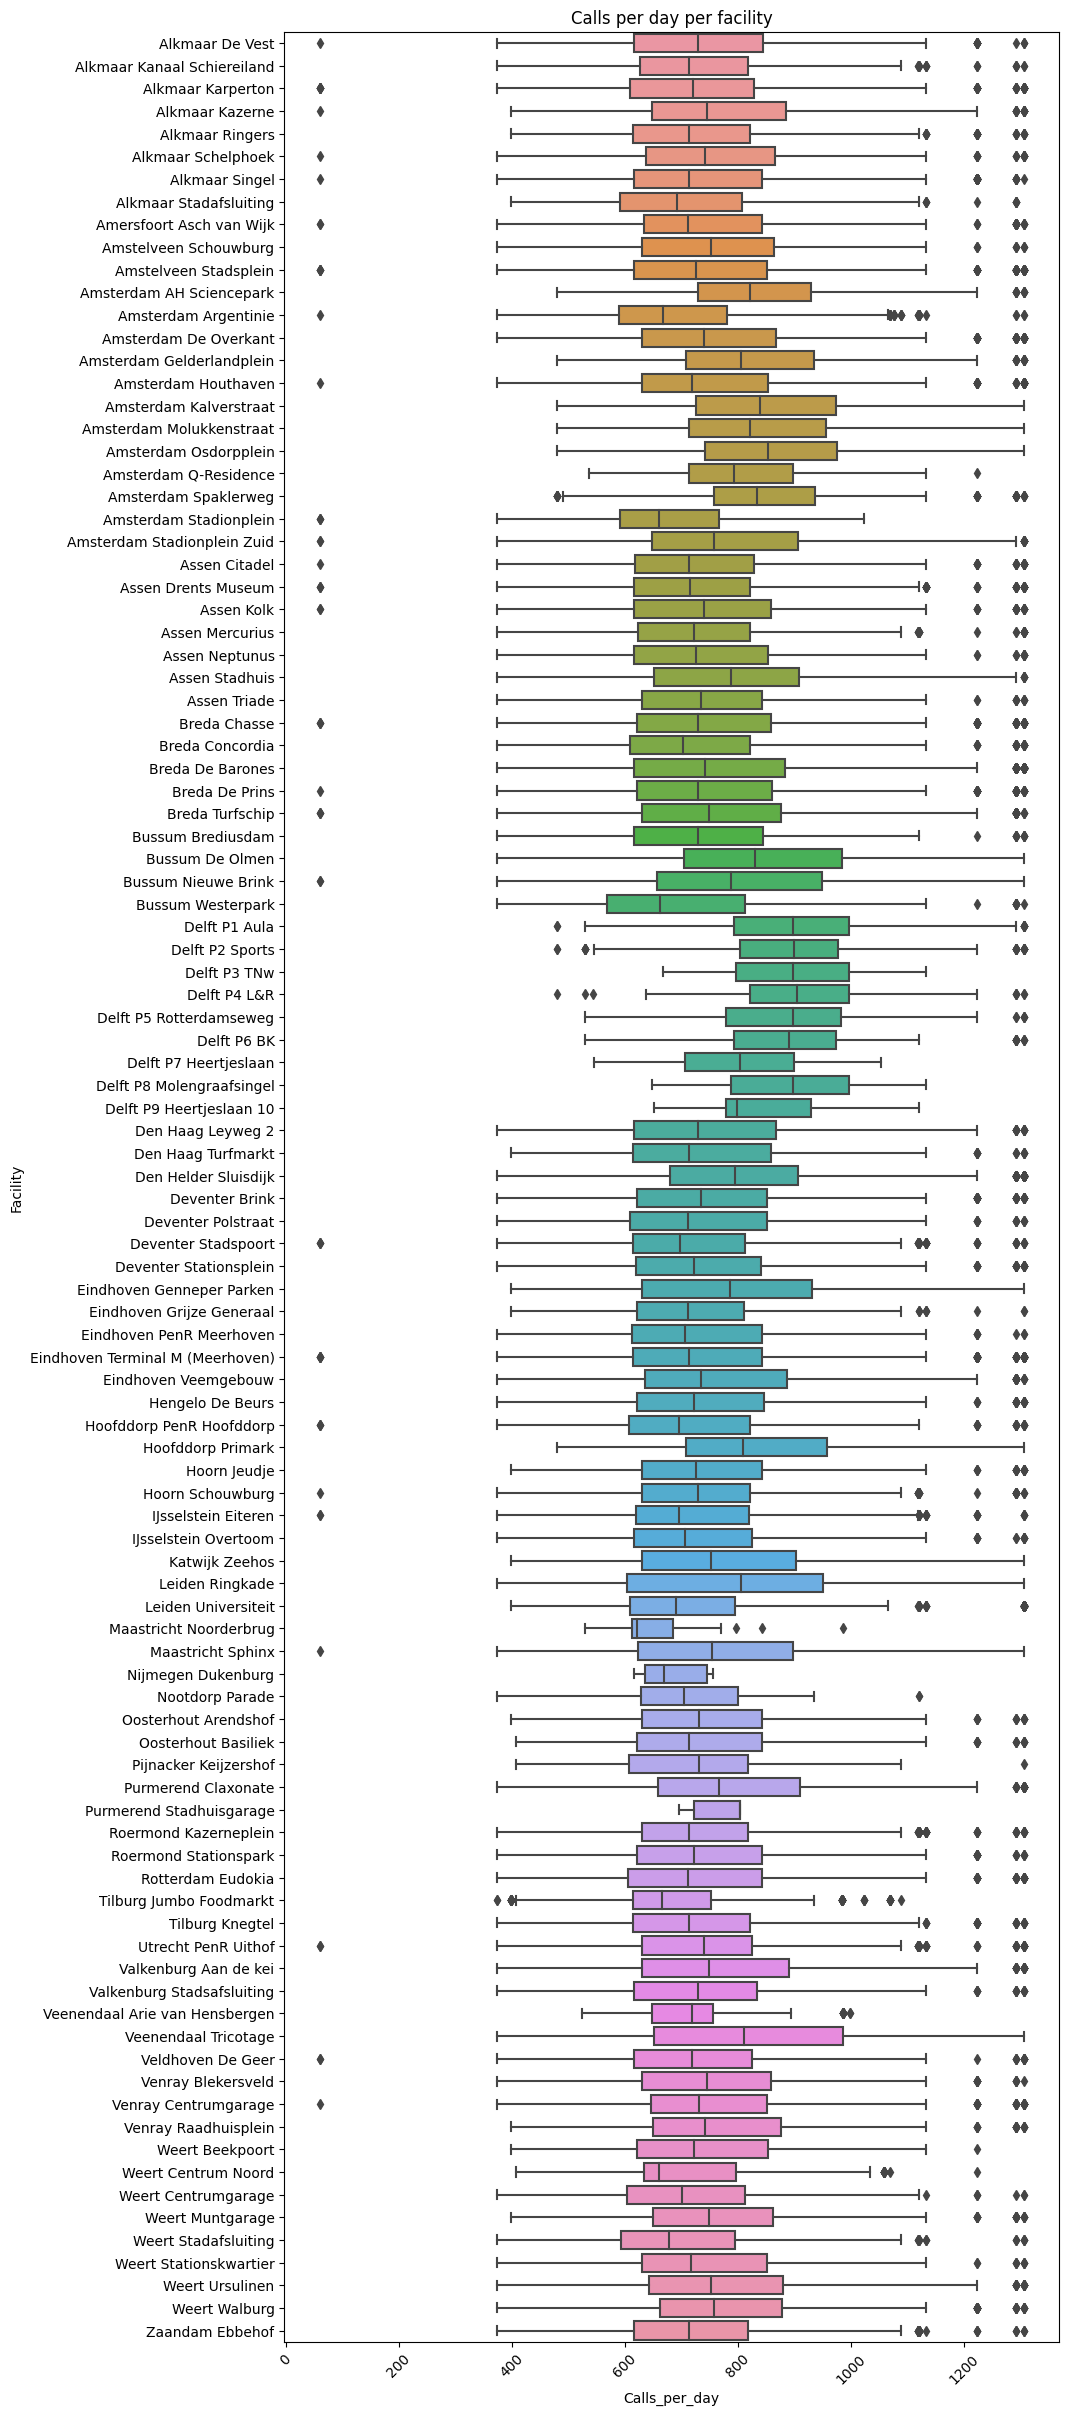

In [25]:
#visualize calls per day per facility
plt.figure(figsize=(10, 30))
sns.boxplot(x='Calls_per_day', y='Facility', data=f_df)
plt.xticks(rotation=45)
plt.title('Calls per day per facility')
plt.show()


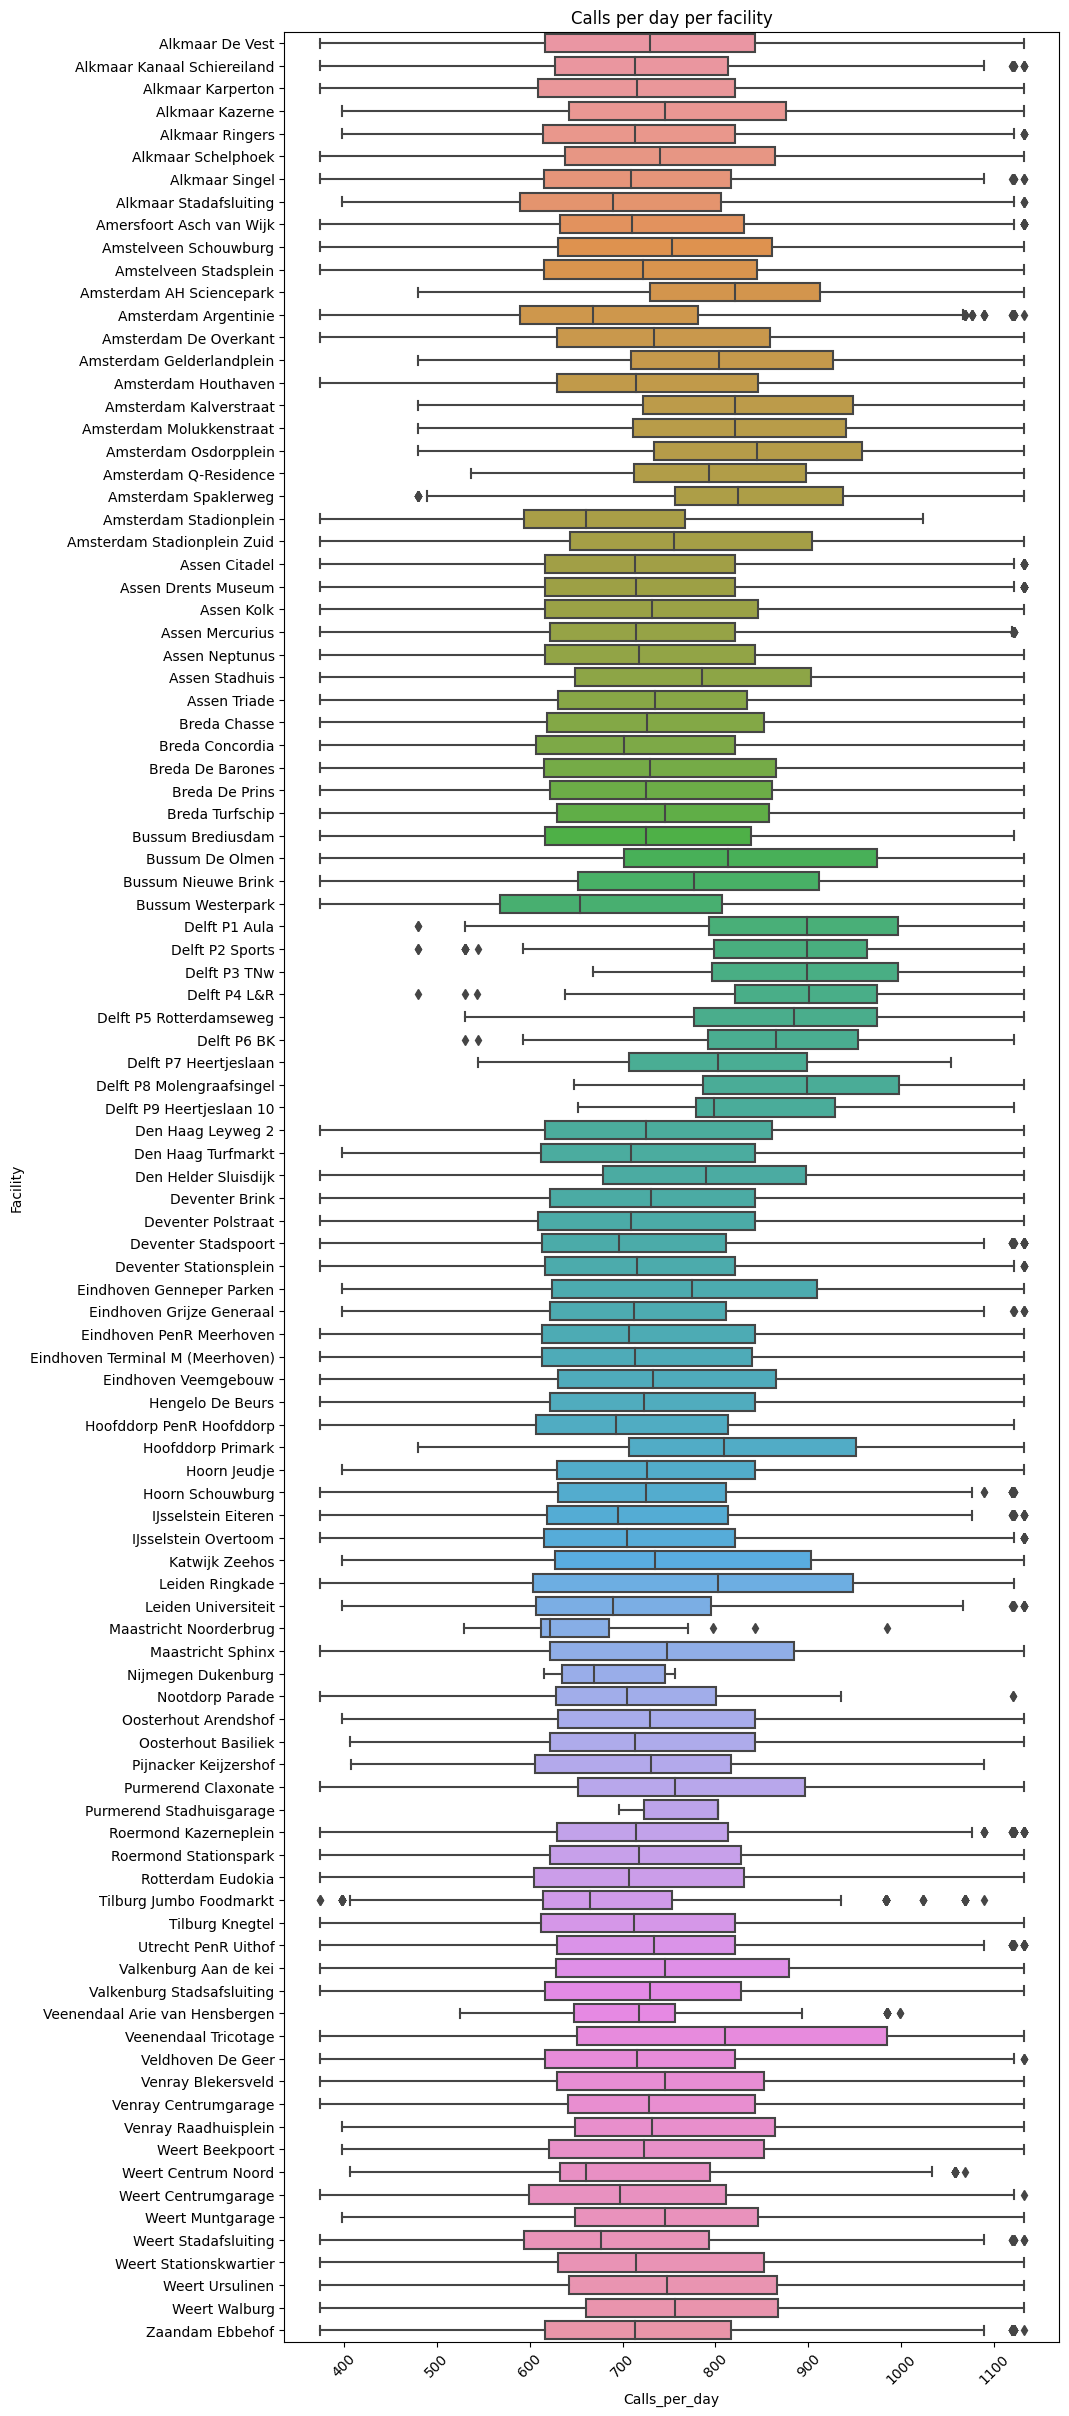

In [27]:
#remove outliers in calls per day
Q1_calls = f_df['Calls_per_day'].quantile(0.25)
Q3_calls = f_df['Calls_per_day'].quantile(0.75)
IQR_calls = Q3_calls - Q1_calls
f_df = f_df[(f_df['Calls_per_day'] >= (Q1_calls - 1.5 * IQR_calls)) & (f_df['Calls_per_day'] <= (Q3_calls + 1.5 * IQR_calls
                                                                                                ))]
            
#visualize calls per day per facility
plt.figure(figsize=(10, 30))
sns.boxplot(x='Calls_per_day', y='Facility', data=f_df)
plt.xticks(rotation=45)
plt.title('Calls per day per facility')
plt.show()


In [17]:
 # Loop through each facility and plot its daily call count 

 #for facility in calls_per_day_facility['Facility'].unique(): 

#    # subset = calls_per_day_facility[calls_per_day_facility['Facility'] == facility] 
#     plt.figure(figsize=(15, 5)) 
#     plt.plot(pd.to_datetime(subset['Date']), subset['CallCount'], label=facility) 
#     plt.title(f'Call Count per Day for {facility}') 
#     plt.xlabel('Date') 
#     plt.ylabel('Number of Calls')
#     plt.legend() 
#     plt.show()

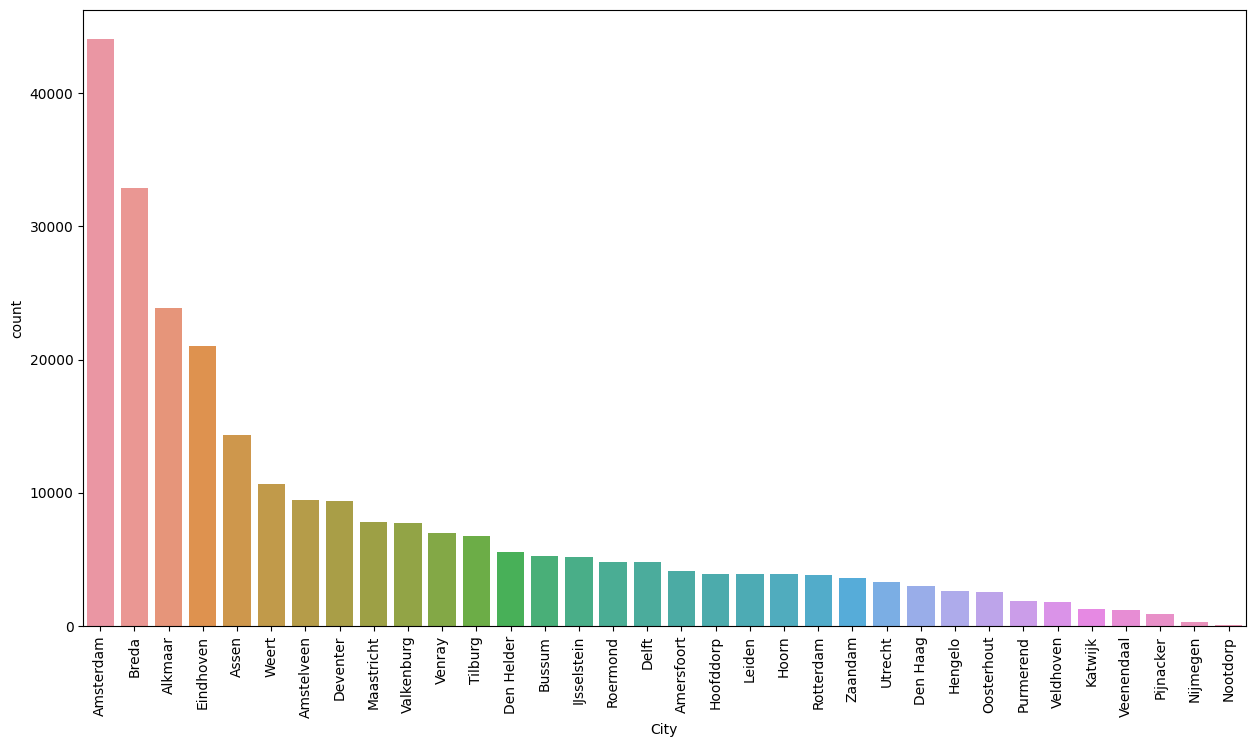

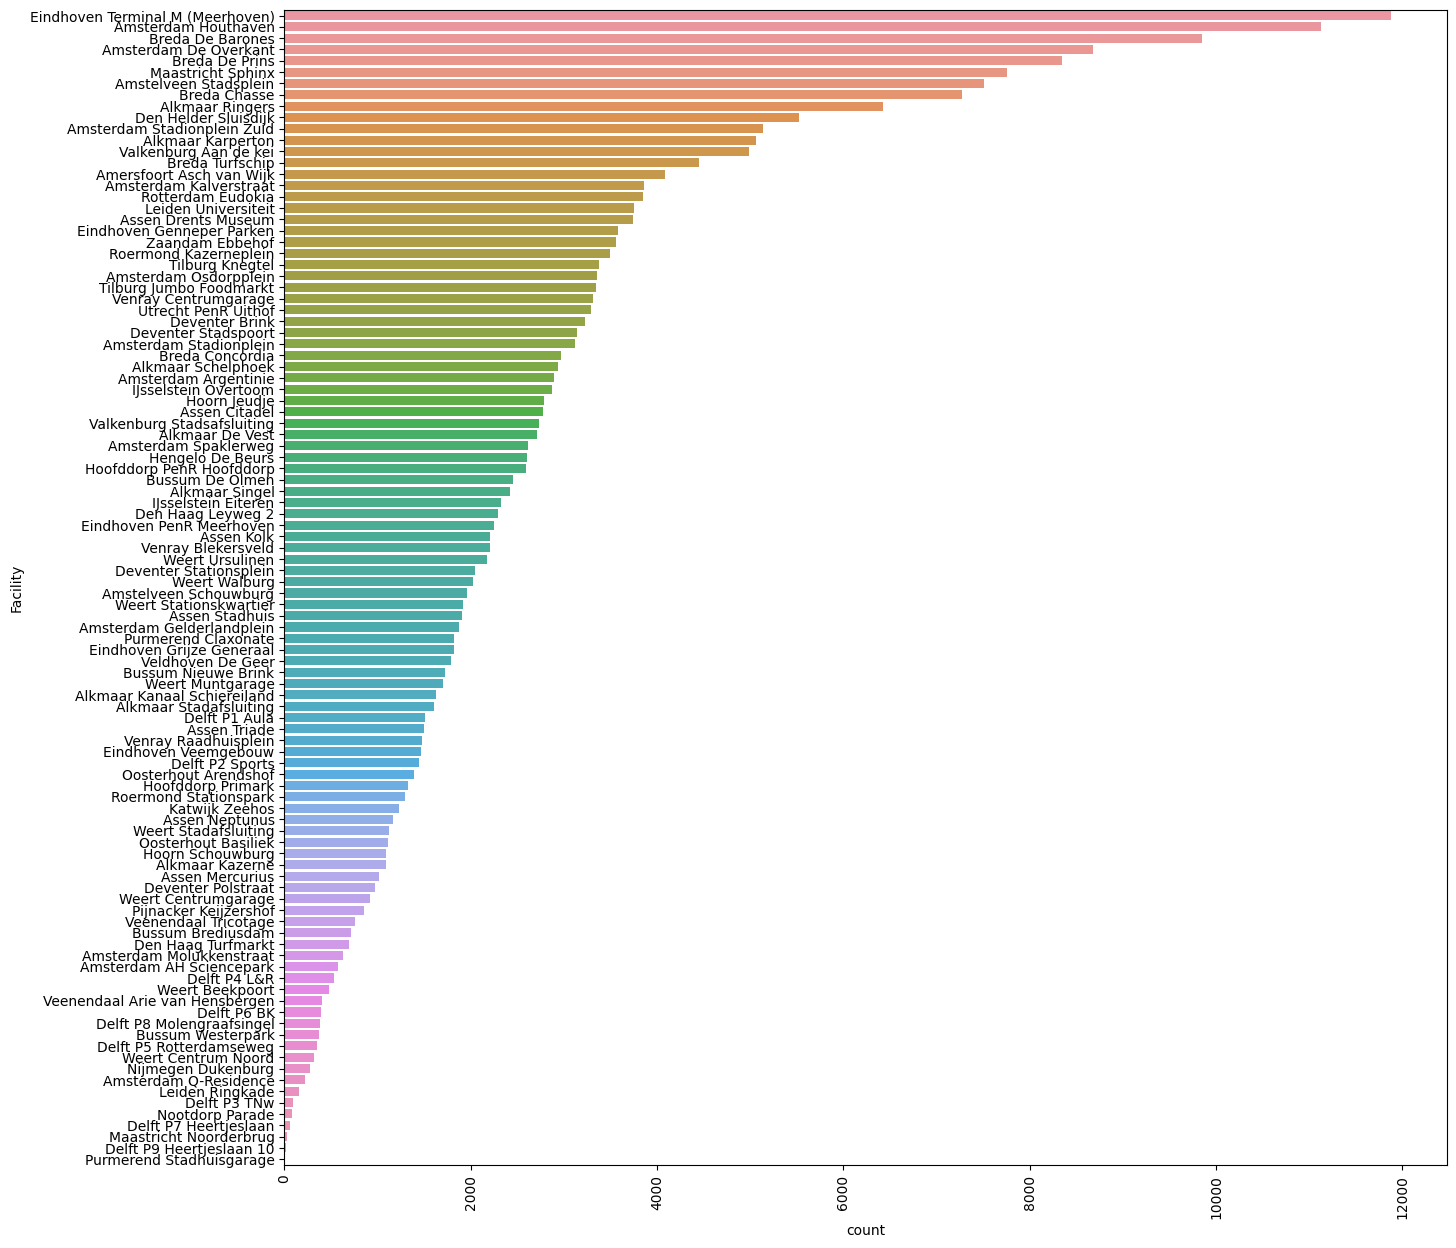

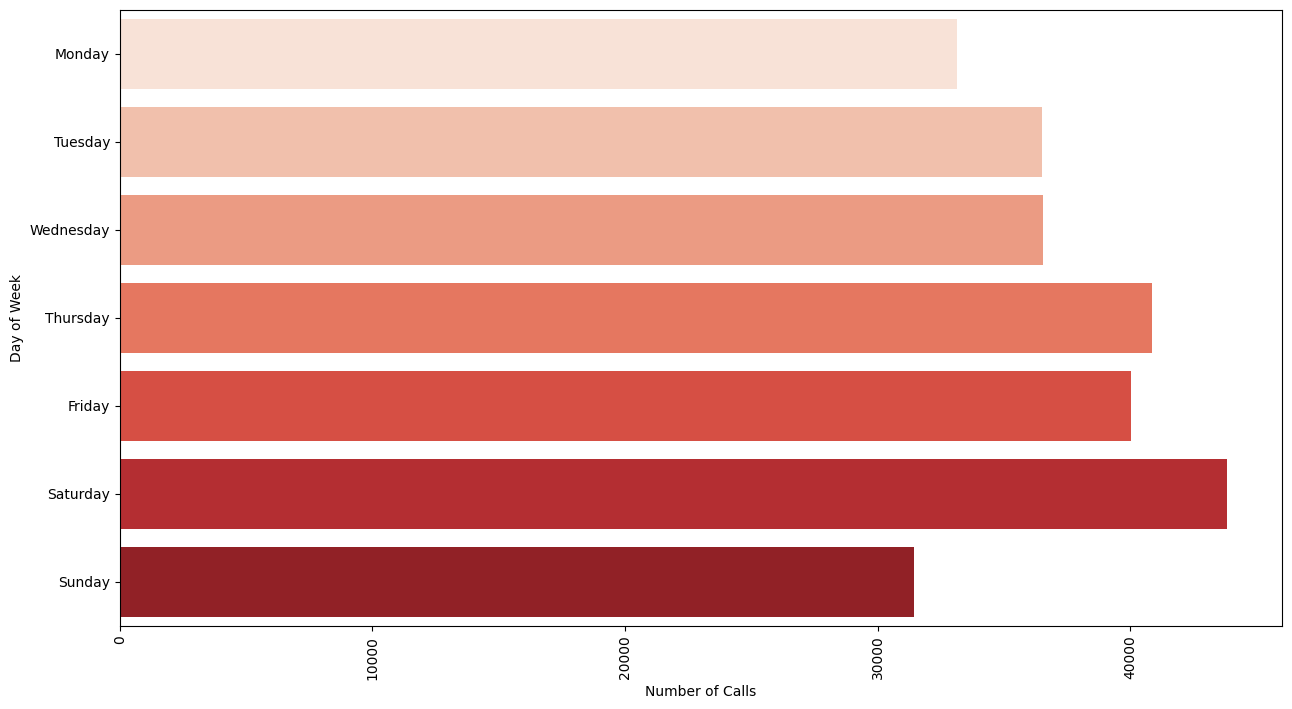

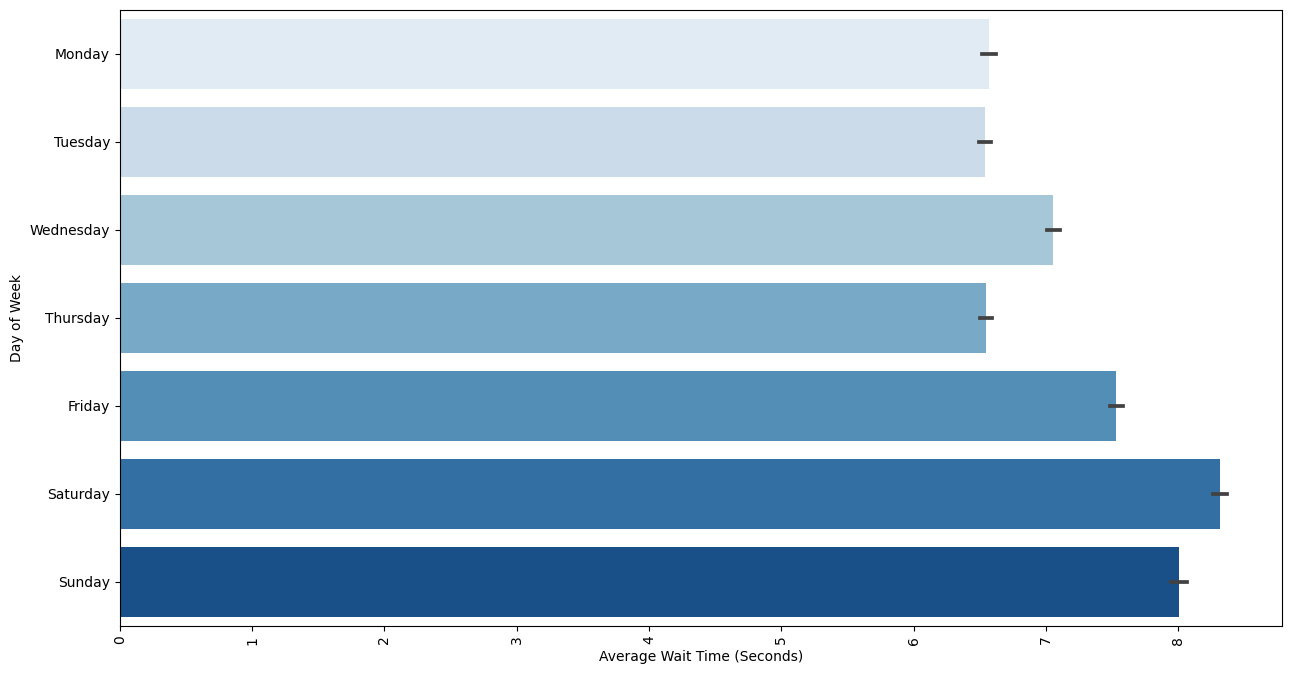

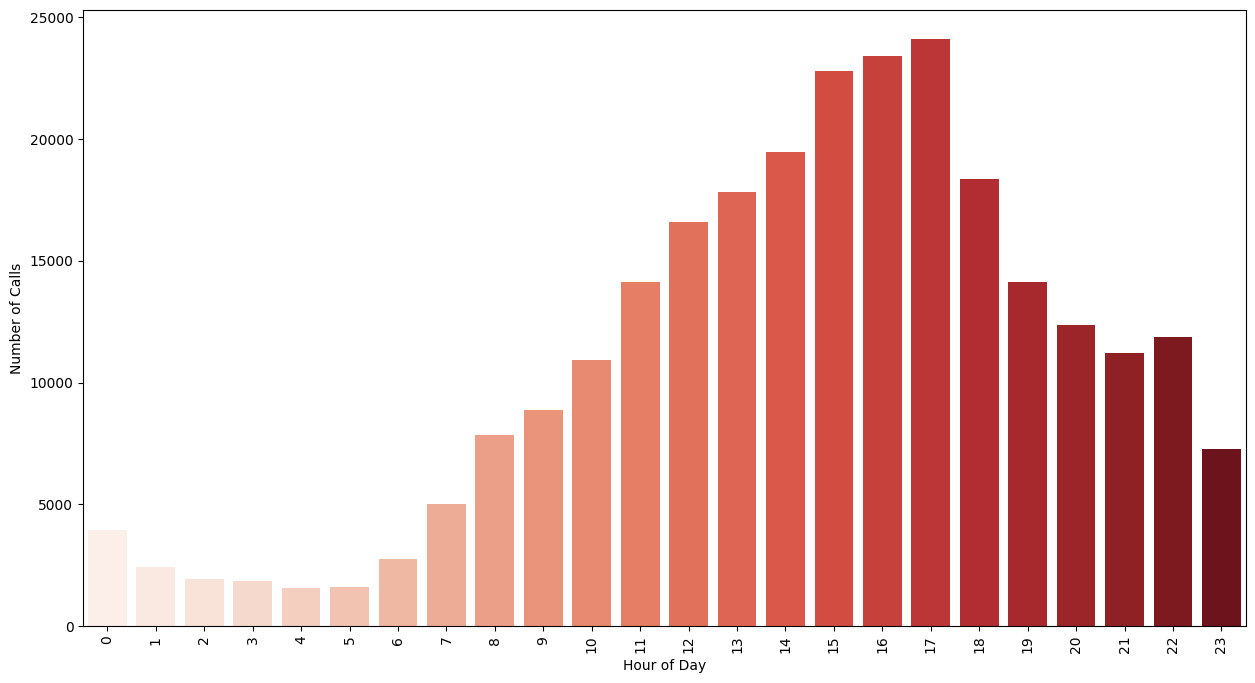

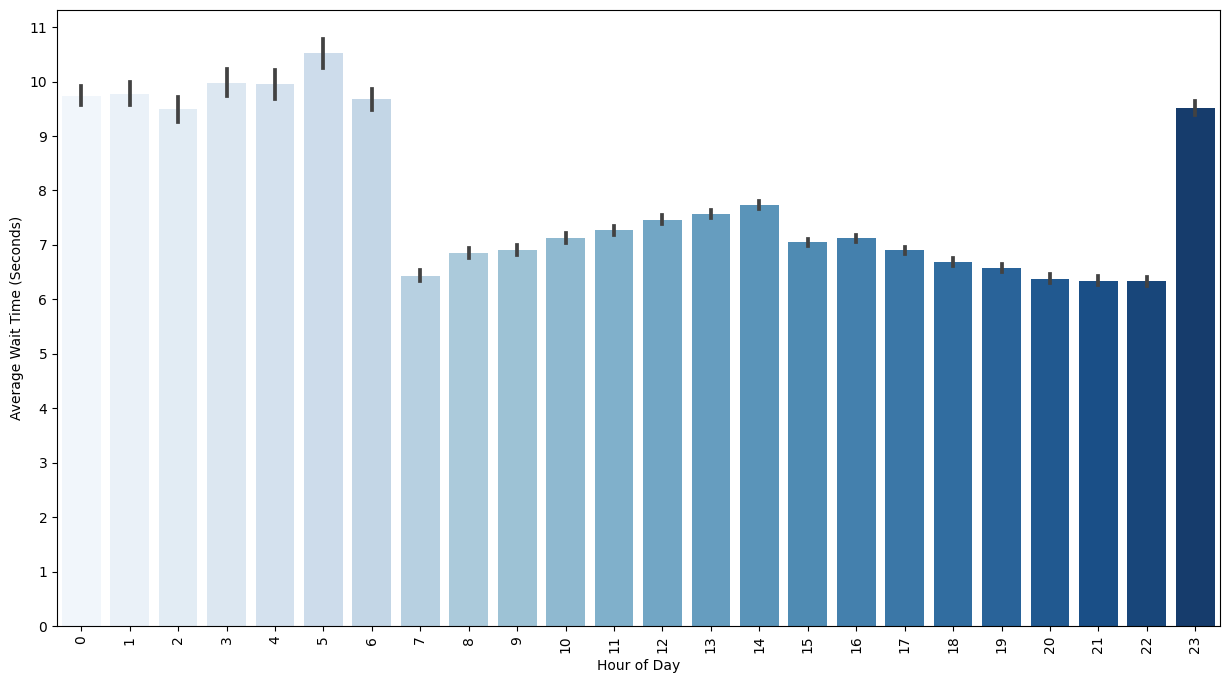

c:\Users\Kays\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


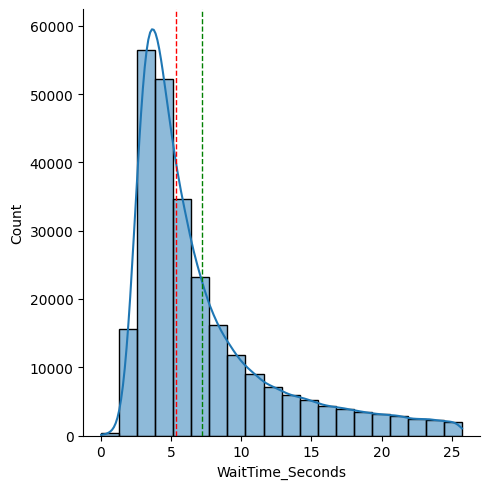

c:\Users\Kays\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


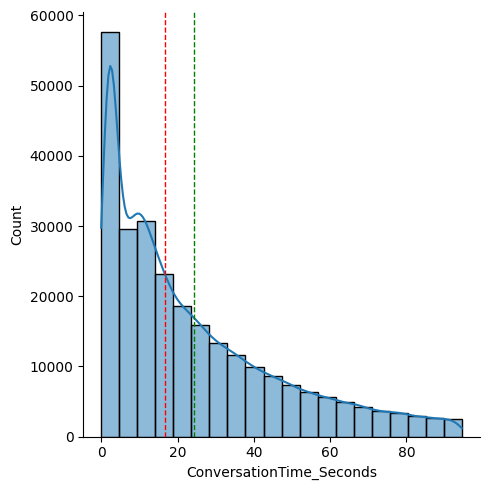

c:\Users\Kays\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


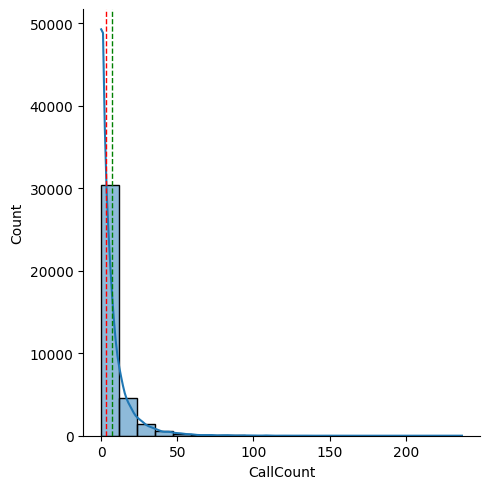

In [18]:
#eda

#check count of reported issues per city
plt.figure(figsize=(15, 8))
sns.countplot(x='City', data=f_df, order=f_df['City'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#more eda, check count of reported issues per facility, ordered by count on the x axis



plt.figure(figsize=(15, 15))
#plot count on x axis
sns.countplot(y='Facility', data=f_df, order=f_df['Facility'].value_counts().index)
plt.xticks(rotation=90)
plt.show()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#check count of reported issues per day of week
plt.figure(figsize=(15, 8))
sns.countplot(y='Day_of_Week', data=f_df, order=order, palette='Reds')
plt.xticks(rotation=90)
plt.xlabel('Number of Calls')
plt.ylabel('Day of Week')
plt.show()

#more eda, AVG wait time per day of week, ordered monday to sunday
plt.figure(figsize=(15, 8))
sns.barplot(y='Day_of_Week', x='WaitTime_Seconds', data=f_df, order=order, palette='Blues')
plt.xticks(rotation=90)
plt.xlabel('Average Wait Time (Seconds)')
plt.ylabel('Day of Week')
plt.show()



#more eda
#check count of reported issues per hour of day
plt.figure(figsize=(15, 8))
sns.countplot(x='Hour_of_Day', data=f_df,palette='Reds')
plt.xticks(rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.show()


#more eda, AVG wait time per hour of day , ordered starting from 7am to 7 am
plt.figure(figsize=(15, 8))
sns.barplot(x='Hour_of_Day', y='WaitTime_Seconds', data=f_df, palette='Blues')
#yticks as seconds
plt.yticks(np.arange(0, 12, 1))
plt.xticks(rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('Average Wait Time (Seconds)')
plt.show()

#selecting a model
#check the distribution of the target variable

#check distribution of WaitTime_Seconds
sns.displot(f_df['WaitTime_Seconds'], kde=True, bins=20)
#annotate median
plt.axvline(f_df['WaitTime_Seconds'].median(), color='r', linestyle='dashed', linewidth=1)
#annotate mean
plt.axvline(f_df['WaitTime_Seconds'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.show()

#check distribution of ConversationTime_Seconds
sns.displot(f_df['ConversationTime_Seconds'], kde=True, bins=20)
#annotate median
plt.axvline(f_df['ConversationTime_Seconds'].median(), color='r', linestyle='dashed', linewidth=1)
#annotate mean
plt.axvline(f_df['ConversationTime_Seconds'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.show()


#more target variables could be : 
#- wait time per day of week
#- wait time per hour of day
#- wait time per facility
#- wait time per city
#- wait time per operator
#- wait time per reason
#- wait time per device

# or we could predict the number of calls per day per facility by using the date as a target variable
#for example we could predict the number of calls per day for the next 30 days for each facility

#check distribution of calls per day per facility
sns.displot(calls_per_day_facility['CallCount'], kde=True, bins=20)
#annotate median
plt.axvline(calls_per_day_facility['CallCount'].median(), color='r', linestyle='dashed', linewidth=1)
#annotate mean
plt.axvline(calls_per_day_facility['CallCount'].mean(), color='g', linestyle='dashed', linewidth=1)
plt.show()



**FEATURE ENGINEERING**

In [19]:
# Created flag column for the devices  
f_df['Device_1'] = f_df['Device'].astype(str) 


def check_exit(value): 
    keywords = ['UIT', 'Exit', 'Uitrit'] 
    return any(keyword in value for keyword in keywords) 

def check_entry(value): 
    keywords = ['IN', 'Entry', 'ENTREE', 'Inrit'] 
    return any(keyword in value for keyword in keywords) 

def check_atm(value): 
    keywords = ['BA', 'Kassa'] # looks for keyword in string value
    return any(keyword in value for keyword in keywords) 

def check_gate(value): 
    keywords = ['SG', 'GATE'] 
    return any(keyword in value for keyword in keywords) 

def check_door(value): 
    keywords = ['Door', 'Deur', 'DL'] 
    return any(keyword in value for keyword in keywords) 

# Apply the functions 
f_df['Exit'] = f_df['Device_1'].apply(check_exit).astype(int) 
f_df['Entry'] = f_df['Device_1'].apply(check_entry).astype(int) 
f_df['Pay'] = f_df['Device_1'].apply(check_atm).astype(int) 
f_df['Gate'] = f_df['Device_1'].apply(check_gate).astype(int) 
f_df['Door'] = f_df['Device_1'].apply(check_door).astype(int) 

 


#turn NA to No reason entered
f_df['Reason'] = f_df['Reason'].fillna('No reason entered')


##Seasonal trends for when its summer and winter 
f_df['IsSummer'] = f_df['DateTime'].dt.month.isin([6, 7, 8]).astype(int)
f_df['IsSpring'] = f_df['DateTime'].dt.month.isin([3, 4, 5]).astype(int)
f_df['IsAutumn'] = f_df['DateTime'].dt.month.isin([9, 10, 11]).astype(int)
f_df['IsWinter'] = f_df['DateTime'].dt.month.isin([12, 1, 2]).astype(int)
# Group by year and week and count the number of calls
weekly_call_counts = f_df.groupby(['Year', 'Week']).size().reset_index(name='CallCountPerWeek')

# Display the first few rows
weekly_call_counts.head()

#merge with f_df
f_df = f_df.merge(weekly_call_counts, on=['Year', 'Week'], how='left')

#created a column Is_weekend to find out if calls were made in the weekends 
## Map day names to weekend or not 
weekend_mapping = {'Monday': False, 'Tuesday': False, 'Wednesday': False, 'Thursday': False, 'Friday': False, 'Saturday': True, 'Sunday': True} 
f_df['IsWeekend'] = f_df['Day_of_Week'].map(weekend_mapping) 

#turn nan to 0
f_df['IsWeekend'] = f_df['IsWeekend'].fillna(0)


#drop nulls in conversation time
f_df = f_df.dropna(subset=['ConversationTime'])

In [20]:

# Calculate mean calls per hour
mean_calls_per_hour = f_df.groupby('Hour_of_Day').size().mean()

# Identify busy hours by comparing each hour's call count with the mean
busy_hours = f_df.groupby('Hour_of_Day').size()[f_df.groupby('Hour_of_Day').size() > mean_calls_per_hour].index

# Create a binary feature for busy hour
f_df['IsBusyHour'] = f_df['Hour_of_Day'].apply(lambda x: 1 if x in busy_hours else 0)

# For lagged features, let's say we want a 1-hour lag
f_df['LaggedBusyHour'] = f_df['IsBusyHour'].shift(1).fillna(method='bfill')

# Create a lagged column for the call count.
# We'll use a 1-hour lag again
f_df['LaggedCallCount'] = f_df['CallCountPerWeek'].shift(1).fillna(method='bfill')



In [21]:
#check if is busy hour makes sense 
f_df[f_df['IsBusyHour'] == 1]['Hour_of_Day'].value_counts()

#it makes sense

Hour_of_Day
17    24099
16    23405
15    22811
14    19449
18    18379
13    17810
12    16591
11    14148
19    14115
20    12379
22    11891
21    11197
10    10932
0         0
1         0
9         0
8         0
7         0
6         0
5         0
4         0
3         0
2         0
23        0
Name: count, dtype: int64

In [22]:
# Calculate the median
median_calls_per_day = f_df['Calls_per_day'].median()
median_call_count_per_week = f_df['CallCountPerWeek'].median()

# Bin the Calls_per_day column
f_df['Calls_per_day_Bin'] = pd.cut(f_df['Calls_per_day'], 
                                    bins=[-np.inf, median_calls_per_day, np.inf], 
                                    labels=['Low_Call_Day', 'High_Call_Day'])

# Bin the CallCountPerWeek column
f_df['CallCountPerWeek_Bin'] = pd.cut(f_df['CallCountPerWeek'], 
                                       bins=[-np.inf, median_call_count_per_week, np.inf], 
                                       labels=['Low_Call_Week', 'High_Call_Week'])

# Create flags for Calls_per_day
f_df['Low_Call_Day_Flag'] = np.where(f_df['Calls_per_day_Bin'] == 'Low_Call_Day', 1, 0)
f_df['High_Call_Day_Flag'] = np.where(f_df['Calls_per_day_Bin'] == 'High_Call_Day', 1, 0)

# Create flags for CallCountPerWeek
f_df['Low_Call_Week_Flag'] = np.where(f_df['CallCountPerWeek_Bin'] == 'Low_Call_Week', 1, 0)
f_df['High_Call_Week_Flag'] = np.where(f_df['CallCountPerWeek_Bin'] == 'High_Call_Week', 1, 0)


In [23]:
# Create the ratio features
small_value = 0.001
f_df['CallDurationRatio'] = f_df['WaitTime_Seconds'] / (f_df['ConversationTime_Seconds'] + small_value)
f_df['PopulationCarRatio'] = f_df['Population_Dens'] / (f_df['cars_per_region'] + small_value)


In [24]:
#turn nan to -
f_df['ReasonEnteredByUser'] = f_df['ReasonEnteredByUser'].fillna('-')

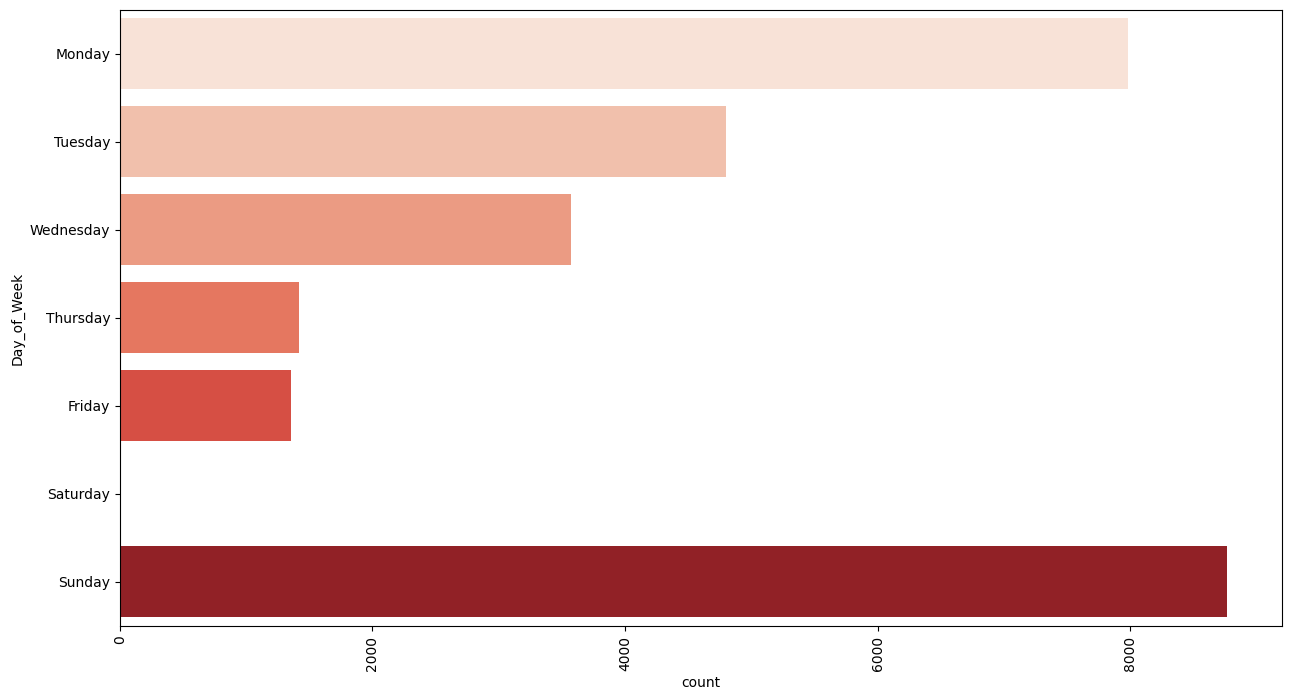

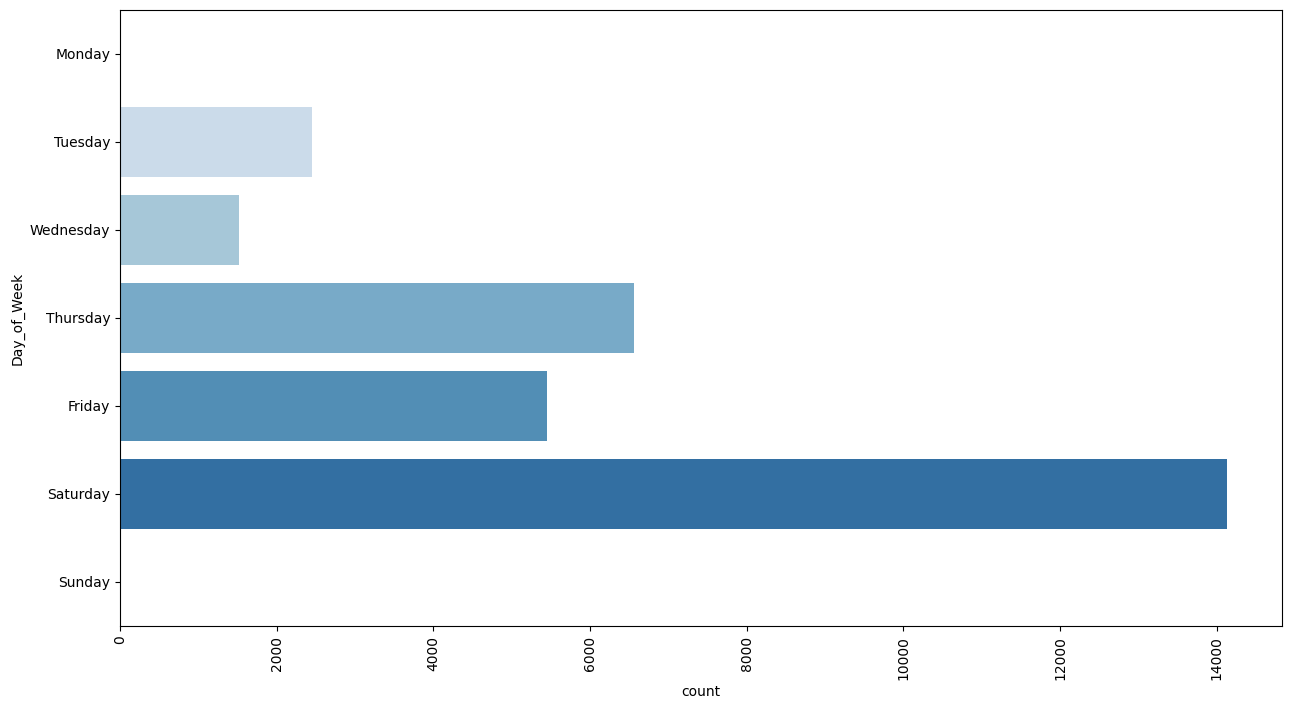

In [25]:
#check what days are the ones most often when it is a high call week, but low call day
f_df[(f_df['High_Call_Week_Flag'] == 1) & (f_df['Low_Call_Day_Flag'] == 1)]['Day_of_Week'].value_counts()

#visualize with days of week
order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15, 8))
sns.countplot(y='Day_of_Week', data=f_df[(f_df['High_Call_Week_Flag'] == 1) & (f_df['Low_Call_Day_Flag'] == 1)], order=order, palette='Reds')
plt.xticks(rotation=90)
plt.show()

#check what days are the ones most often when it is a low call week, but high call day
f_df[(f_df['Low_Call_Week_Flag'] == 1) & (f_df['High_Call_Day_Flag'] == 1)]['Day_of_Week'].value_counts()

#visualize with days of week
plt.figure(figsize=(15, 8))
sns.countplot(y='Day_of_Week', data=f_df[(f_df['Low_Call_Week_Flag'] == 1) & (f_df['High_Call_Day_Flag'] == 1)], order=order, palette='Blues')
plt.xticks(rotation=90)
plt.show()


In [26]:
#drop ReasonEnteredByUser and Operator columns
f_df = f_df.drop(['ReasonEnteredByUser'], axis=1)
f_df = f_df.drop(['Operator'], axis=1)

#create month column
f_df['Month'] = f_df['DateTime'].dt.month


In [27]:
f_df.columns

Index(['DateTime', 'City', 'Facility', 'Desk', 'WaitTime', 'ConversationTime',
       'Reason', 'Flag_MissedCall', 'Flag_NoCallReceived',
       'Flag_BarrierOpened', 'Region', 'ID', 'RegioS', 'Population_Dens',
       'DistanceTravelled_5', 'cars_per_region', 'cars_per_region_1000',
       'Date', 'ConversationTime_Seconds', 'WaitTime_Seconds', 'Day_of_Week',
       'Hour_of_Day', 'Week', 'Year', 'Operator_ID', 'Holiday', 'Device',
       'Calls_per_day', 'Device_1', 'Exit', 'Entry', 'Pay', 'Gate', 'Door',
       'IsSummer', 'IsSpring', 'IsAutumn', 'IsWinter', 'CallCountPerWeek',
       'IsWeekend', 'IsBusyHour', 'LaggedBusyHour', 'LaggedCallCount',
       'Calls_per_day_Bin', 'CallCountPerWeek_Bin', 'Low_Call_Day_Flag',
       'High_Call_Day_Flag', 'Low_Call_Week_Flag', 'High_Call_Week_Flag',
       'CallDurationRatio', 'PopulationCarRatio', 'Month'],
      dtype='object')

In [28]:
# check total nr of times each device was used ine ach facility
device_usage_per_facility = f_df.groupby('Facility').agg({
    'Gate': 'sum',
    'Entry': 'sum',
    'Exit': 'sum',
    'Pay': 'sum',
    'Door': 'sum'
}).reset_index()


# Display the first few rows
device_usage_per_facility.head()

,Facility,Gate,Entry,Exit,Pay,Door
0,Alkmaar De Vest,0,1368,890,264,0
1,Alkmaar Kanaal Schiereiland,0,341,928,362,0
2,Alkmaar Karperton,0,898,2519,1380,260
3,Alkmaar Kazerne,0,70,311,0,671
4,Alkmaar Ringers,0,716,4061,1639,0


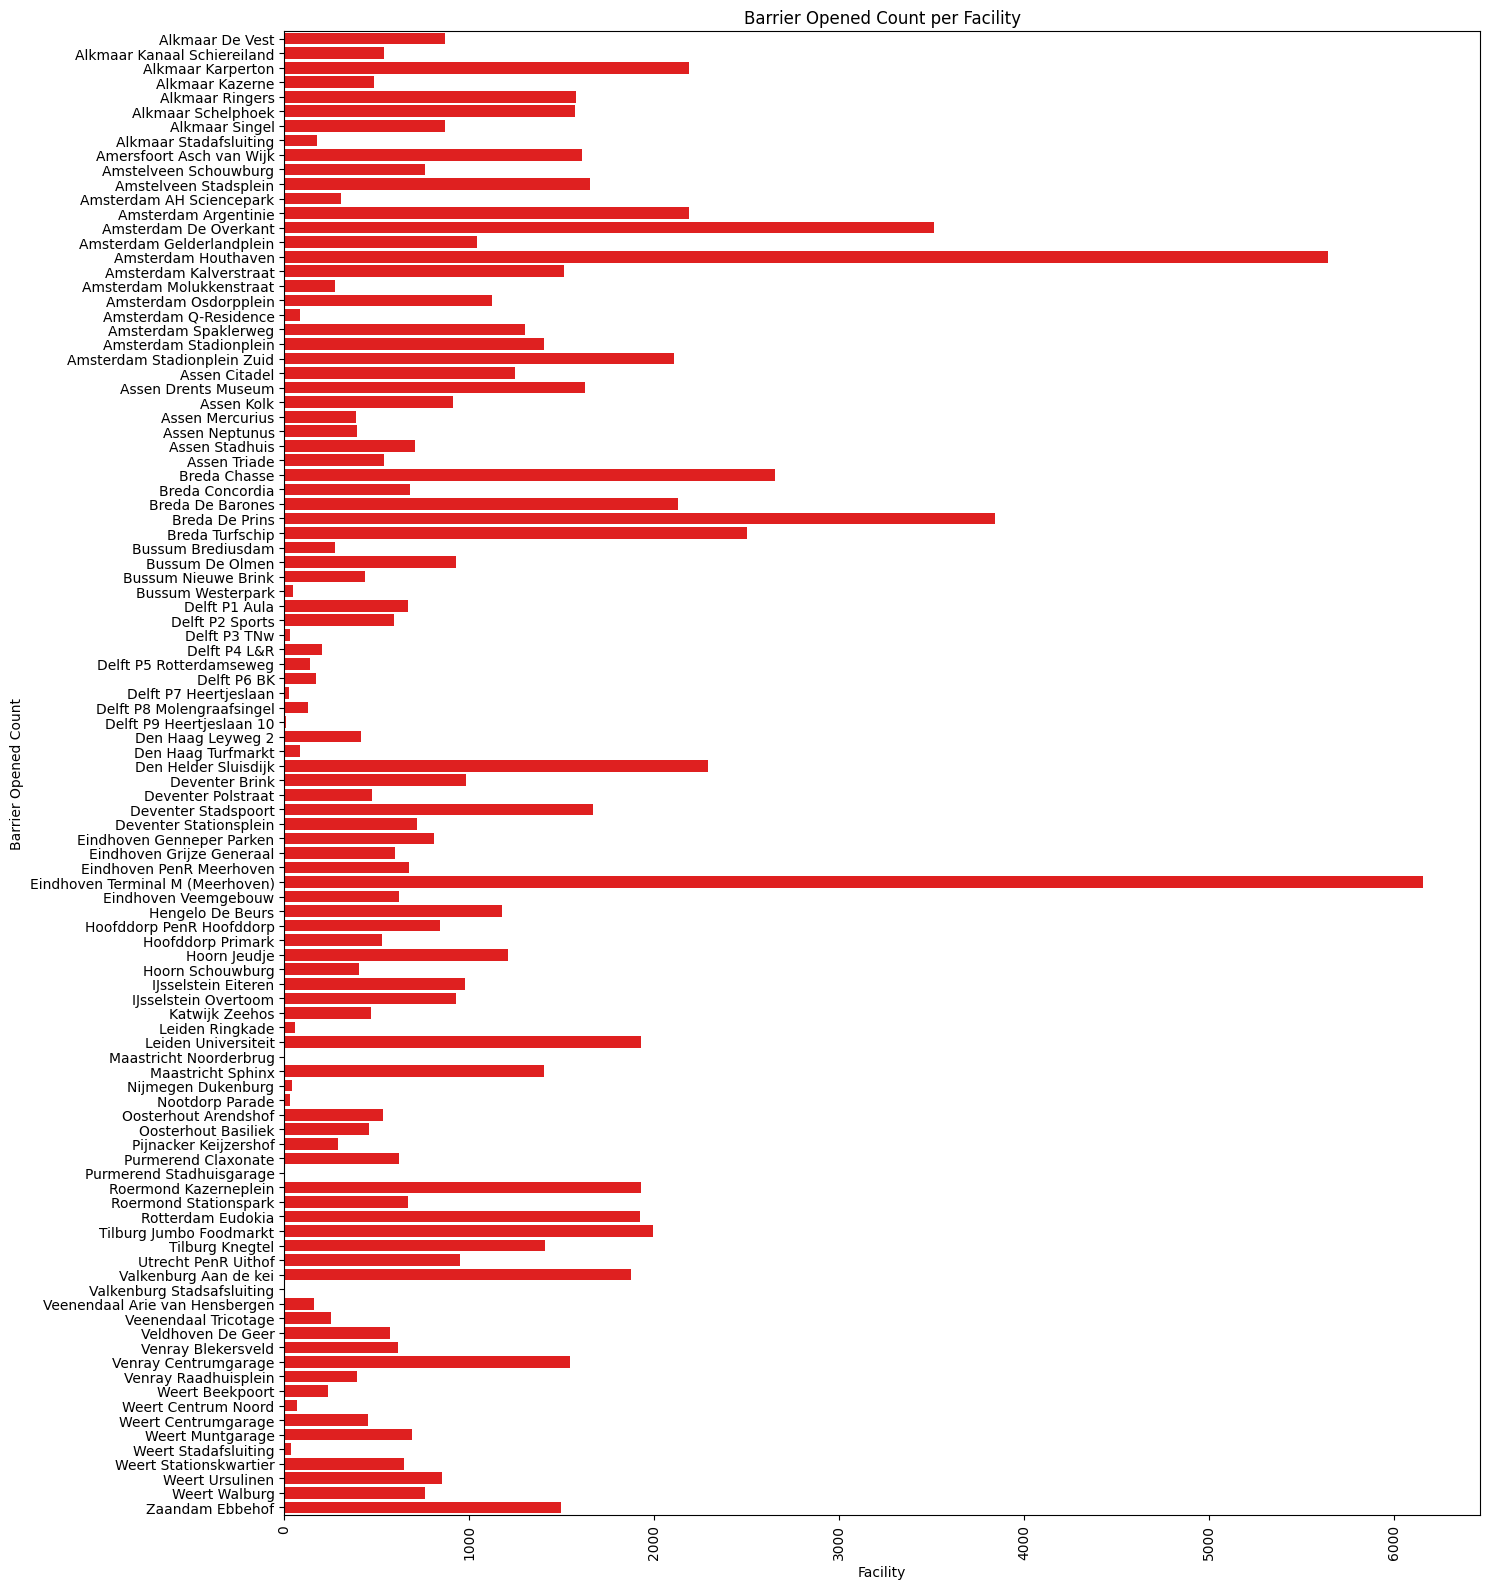

In [29]:
barrier_opened_count = f_df.groupby('Facility')['Flag_BarrierOpened'].sum().reset_index(name='BarrierOpenedCount')
device_usage_df = device_usage_per_facility.merge(barrier_opened_count, on='Facility', how='left')

# Visualize results
plt.figure(figsize=(15, 16))
sns.barplot(x='BarrierOpenedCount', y='Facility', data=device_usage_df, color='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
# Set labels and title
plt.xlabel('Facility')
plt.ylabel('Barrier Opened Count')
plt.title('Barrier Opened Count per Facility')
plt.tight_layout()

# Display the plot
plt.show()

In [30]:
#merge with f_df
f_df = f_df.merge(device_usage_df, on='Facility', how='left')

In [31]:

f_df.columns

Index(['DateTime', 'City', 'Facility', 'Desk', 'WaitTime', 'ConversationTime',
       'Reason', 'Flag_MissedCall', 'Flag_NoCallReceived',
       'Flag_BarrierOpened', 'Region', 'ID', 'RegioS', 'Population_Dens',
       'DistanceTravelled_5', 'cars_per_region', 'cars_per_region_1000',
       'Date', 'ConversationTime_Seconds', 'WaitTime_Seconds', 'Day_of_Week',
       'Hour_of_Day', 'Week', 'Year', 'Operator_ID', 'Holiday', 'Device',
       'Calls_per_day', 'Device_1', 'Exit_x', 'Entry_x', 'Pay_x', 'Gate_x',
       'Door_x', 'IsSummer', 'IsSpring', 'IsAutumn', 'IsWinter',
       'CallCountPerWeek', 'IsWeekend', 'IsBusyHour', 'LaggedBusyHour',
       'LaggedCallCount', 'Calls_per_day_Bin', 'CallCountPerWeek_Bin',
       'Low_Call_Day_Flag', 'High_Call_Day_Flag', 'Low_Call_Week_Flag',
       'High_Call_Week_Flag', 'CallDurationRatio', 'PopulationCarRatio',
       'Month', 'Gate_y', 'Entry_y', 'Exit_y', 'Pay_y', 'Door_y',
       'BarrierOpenedCount'],
      dtype='object')

In [32]:

#drop gate_y, entry_y, exit_y, pay_y, door_y columns
f_df = f_df.drop(['Gate_y', 'Entry_y', 'Exit_y', 'Pay_y', 'Door_y'], axis=1)

In [33]:
f_df['BarrierOpened_DayOfWeek_Interaction'] = f_df['Flag_BarrierOpened'] * f_df['DateTime'].dt.dayofweek # interaction between barrier opened and day of week
f_df['BarrierOpened_HourOfDay_Interaction'] = f_df['Flag_BarrierOpened'] * f_df['DateTime'].dt.hour # interaction between barrier opened and hour of day


In [34]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode facility
f_df['Facility'] = labelencoder.fit_transform(f_df['Facility'])

#encode city
f_df['City'] = labelencoder.fit_transform(f_df['City'])

#encode region
f_df['Region'] = labelencoder.fit_transform(f_df['Region'])

#encode day of week
f_df['Day_of_Week'] = labelencoder.fit_transform(f_df['Day_of_Week'])

#encode device
f_df['Device'] = labelencoder.fit_transform(f_df['Device'])

#encode operator
f_df['Operator_ID'] = labelencoder.fit_transform(f_df['Operator_ID'])

#encode reason
f_df['Reason'] = labelencoder.fit_transform(f_df['Reason'])



In [35]:

#drop regioS
f_df = f_df.drop(['RegioS'], axis=1)

In [36]:
#check the data
f_df.columns

Index(['DateTime', 'City', 'Facility', 'Desk', 'WaitTime', 'ConversationTime',
       'Reason', 'Flag_MissedCall', 'Flag_NoCallReceived',
       'Flag_BarrierOpened', 'Region', 'ID', 'Population_Dens',
       'DistanceTravelled_5', 'cars_per_region', 'cars_per_region_1000',
       'Date', 'ConversationTime_Seconds', 'WaitTime_Seconds', 'Day_of_Week',
       'Hour_of_Day', 'Week', 'Year', 'Operator_ID', 'Holiday', 'Device',
       'Calls_per_day', 'Device_1', 'Exit_x', 'Entry_x', 'Pay_x', 'Gate_x',
       'Door_x', 'IsSummer', 'IsSpring', 'IsAutumn', 'IsWinter',
       'CallCountPerWeek', 'IsWeekend', 'IsBusyHour', 'LaggedBusyHour',
       'LaggedCallCount', 'Calls_per_day_Bin', 'CallCountPerWeek_Bin',
       'Low_Call_Day_Flag', 'High_Call_Day_Flag', 'Low_Call_Week_Flag',
       'High_Call_Week_Flag', 'CallDurationRatio', 'PopulationCarRatio',
       'Month', 'BarrierOpenedCount', 'BarrierOpened_DayOfWeek_Interaction',
       'BarrierOpened_HourOfDay_Interaction'],
      dtype='object'

In [37]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262318 entries, 0 to 262317
Data columns (total 54 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   DateTime                             262318 non-null  datetime64[ns]
 1   City                                 262318 non-null  int32         
 2   Facility                             262318 non-null  int32         
 3   Desk                                 262318 non-null  object        
 4   WaitTime                             262318 non-null  object        
 5   ConversationTime                     262318 non-null  object        
 6   Reason                               262318 non-null  int32         
 7   Flag_MissedCall                      262318 non-null  object        
 8   Flag_NoCallReceived                  262318 non-null  object        
 9   Flag_BarrierOpened                   262318 non-null  int32         
 

In [38]:
#check the data
f_df.isnull().sum()


DateTime                               0
City                                   0
Facility                               0
Desk                                   0
WaitTime                               0
ConversationTime                       0
Reason                                 0
Flag_MissedCall                        0
Flag_NoCallReceived                    0
Flag_BarrierOpened                     0
Region                                 0
ID                                     0
Population_Dens                        0
DistanceTravelled_5                    0
cars_per_region                        0
cars_per_region_1000                   0
Date                                   0
ConversationTime_Seconds               0
WaitTime_Seconds                       0
Day_of_Week                            0
Hour_of_Day                            0
Week                                   0
Year                                   0
Operator_ID                            0
Holiday         

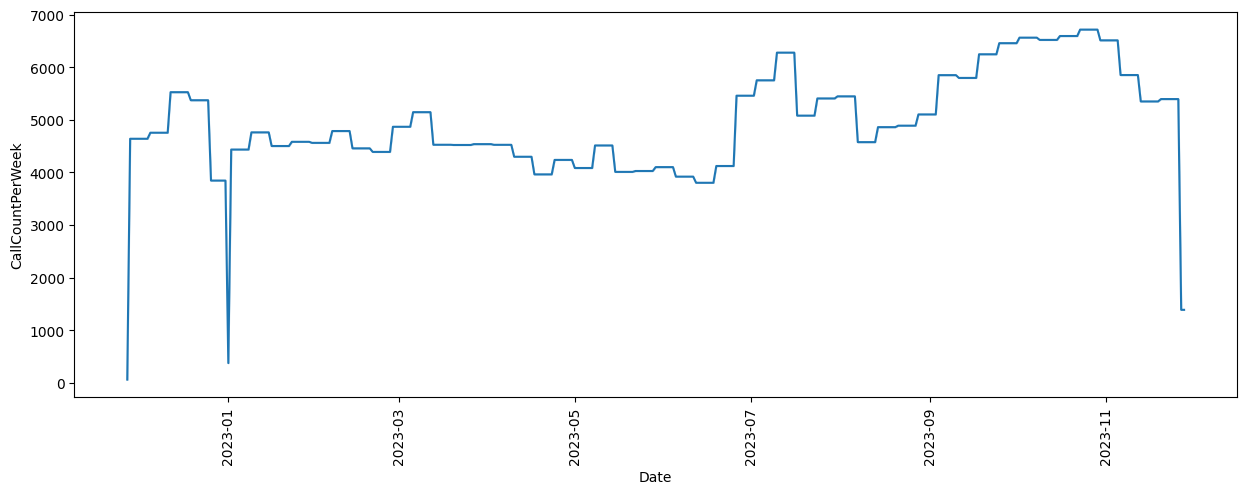

In [39]:
#plot of calls per week
plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='CallCountPerWeek', data=f_df)
plt.xticks(rotation=90)
plt.show()


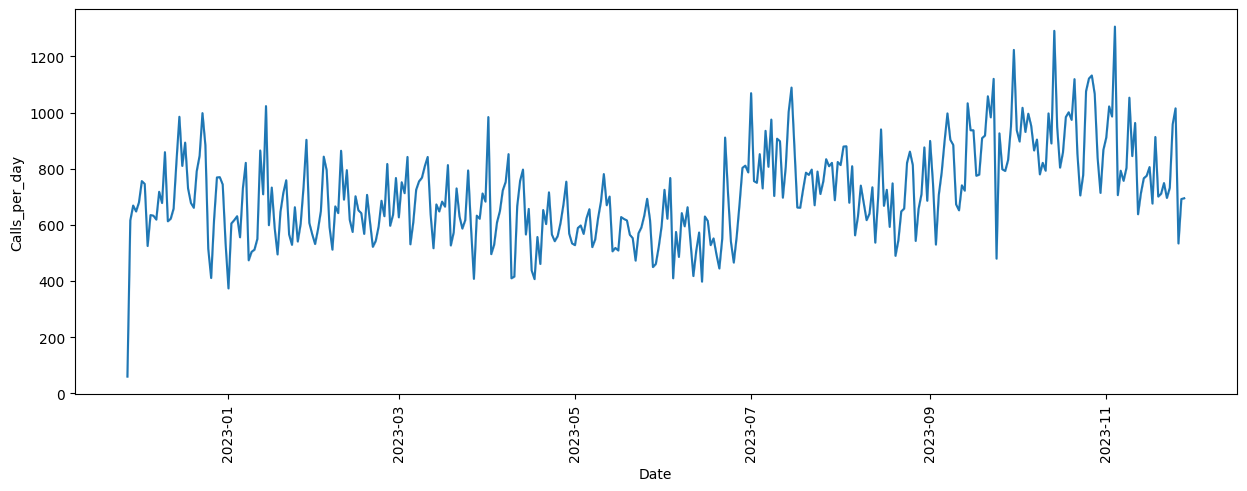

In [40]:
#plot calls_per_day
plt.figure(figsize=(15, 5))
sns.lineplot(x='Date', y='Calls_per_day', data=f_df)
plt.xticks(rotation=90)
plt.show()

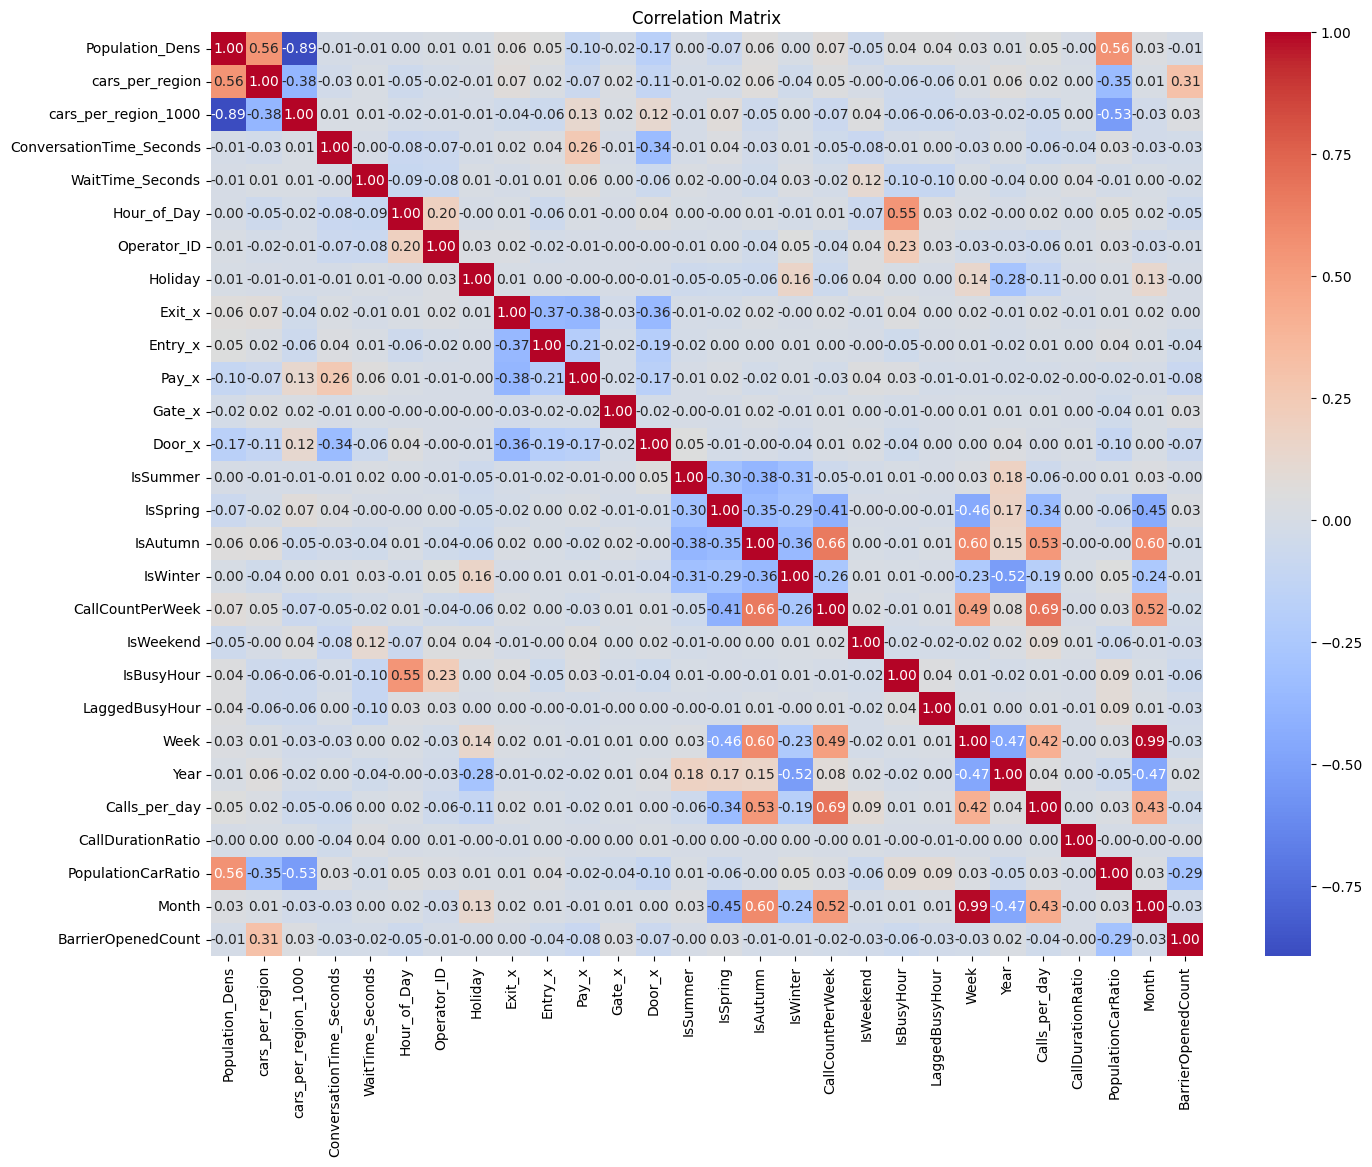

In [41]:

# Calculate the correlation matrix
corr_matrix = f_df[['Population_Dens', 'cars_per_region', 'cars_per_region_1000', 
                    'ConversationTime_Seconds', 'WaitTime_Seconds', 'Hour_of_Day', 
                    'Operator_ID', 'Holiday', 'Exit_x', 'Entry_x', 'Pay_x', 'Gate_x', 
                    'Door_x', 'IsSummer', 'IsSpring', 'IsAutumn', 'IsWinter', 
                    'CallCountPerWeek', 'IsWeekend', 'IsBusyHour', 'LaggedBusyHour', 'Week', 'Year', 'Calls_per_day', 'CallDurationRatio', 'PopulationCarRatio','Month','BarrierOpenedCount']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [42]:
#encode calls per day bin and call per week bin
f_df['Calls_per_day_Bin'] = labelencoder.fit_transform(f_df['Calls_per_day_Bin'])
f_df['CallCountPerWeek_Bin'] = labelencoder.fit_transform(f_df['CallCountPerWeek_Bin'])

In [43]:
f_df.head()

,DateTime,City,Facility,Desk,WaitTime,ConversationTime,Reason,Flag_MissedCall,Flag_NoCallReceived,Flag_BarrierOpened,...,Low_Call_Day_Flag,High_Call_Day_Flag,Low_Call_Week_Flag,High_Call_Week_Flag,CallDurationRatio,PopulationCarRatio,Month,BarrierOpenedCount,BarrierOpened_DayOfWeek_Interaction,BarrierOpened_HourOfDay_Interaction
0,2023-11-06 16:30:49.017,11,58,9932,00:00:25.703000,00:00:10.933000,3,0,0,0,...,0,1,0,1,2.350741,0.000364,11,6155,0,0
1,2023-04-11 16:15:23.137,5,33,9931,00:00:25.697000,00:00:04.193000,4,0,0,1,...,1,0,1,0,6.127086,0.000364,4,3839,1,16
2,2023-11-19 16:02:18.117,5,30,9922,00:00:25.696000,00:00:08.287000,1,0,0,0,...,1,0,0,1,3.100386,0.000364,11,2650,0,0
3,2023-10-24 14:31:06.193,21,74,9927,00:00:25.694000,00:00:15,2,0,0,0,...,0,1,0,1,1.712819,0.000364,10,534,0,0
4,2022-12-05 15:58:53.717,30,89,9924,00:00:25.694000,00:00:01.920000,4,0,0,1,...,1,0,1,0,13.375325,0.000364,12,572,0,15


In [44]:
# Drop DateTime and extract relevant datetime features separately
f_df['Year'] = f_df['DateTime'].dt.year
f_df['Month'] = f_df['DateTime'].dt.month
f_df['Day'] = f_df['DateTime'].dt.day
f_df['DayOfWeek'] = f_df['DateTime'].dt.dayofweek
f_df['Hour'] = f_df['DateTime'].dt.hour

**MODEL DEVELOPMENT & SELECTION**

In [45]:
#now we can select a model based on the distribution of the target variable

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = f_df.drop(['DateTime', 'Desk', 'WaitTime', 'ConversationTime',
       'Reason', 'Flag_MissedCall', 'Flag_NoCallReceived',
       'ID',
       'Date',
       'Year', 'Operator_ID', 'Device',
       'Calls_per_day', 'Device_1', 'Exit_x', 'Entry_x', 'Pay_x', 'Gate_x', 'Door_x', 'CallCountPerWeek', 'LaggedCallCount',
       'Calls_per_day_Bin', 'CallCountPerWeek_Bin', 'Low_Call_Day_Flag', 'High_Call_Week_Flag','High_Call_Day_Flag','Week','Low_Call_Week_Flag','Month' 
], axis=1) #dropped month column, to avoid introducing biases or incorrect assumptions 
                 # Drop irrelevant columns
y = f_df['High_Call_Week_Flag'] # Set target variable

# Step 2: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

# Evaluate the model
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy score:  0.9943008539188777
Precision score:  0.9934681181959565
Recall score:  0.9948993497644356
F1 score:  0.9941832188782757


In [46]:
X.head()

,City,Facility,Flag_BarrierOpened,Region,Population_Dens,DistanceTravelled_5,cars_per_region,cars_per_region_1000,ConversationTime_Seconds,WaitTime_Seconds,...,IsBusyHour,LaggedBusyHour,CallDurationRatio,PopulationCarRatio,BarrierOpenedCount,BarrierOpened_DayOfWeek_Interaction,BarrierOpened_HourOfDay_Interaction,Day,DayOfWeek,Hour
0,11,58,0,3,529,5956,1452605,553,10.933,25.703,...,1,1.0,2.350741,0.000364,6155,0,0,6,0,16
1,5,33,1,3,529,5956,1452605,553,4.193,25.697,...,1,1.0,6.127086,0.000364,3839,1,16,11,1,16
2,5,30,0,3,529,5956,1452605,553,8.287,25.696,...,1,1.0,3.100386,0.000364,2650,0,0,19,6,16
3,21,74,0,3,529,5956,1452605,553,15.000,25.694,...,1,1.0,1.712819,0.000364,534,0,0,24,1,14
4,30,89,1,3,529,5956,1452605,553,1.920,25.694,...,1,1.0,13.375325,0.000364,572,0,15,5,0,15


In [47]:
# Random forest classifier, predicting high call week flag
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

# Evaluate RF
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9643183897529735
Precision: 0.9818674869470191
Recall: 0.944554763851575
F1 Score: 0.9628497717801152
ROC-AUC: 0.9639132431706999


Accuracy: 0.8778400426959438
Precision: 0.9060419651133396
Recall: 0.8372853638593623
F1 Score: 0.8703077888176134
ROC-AUC: 0.8770086876800266


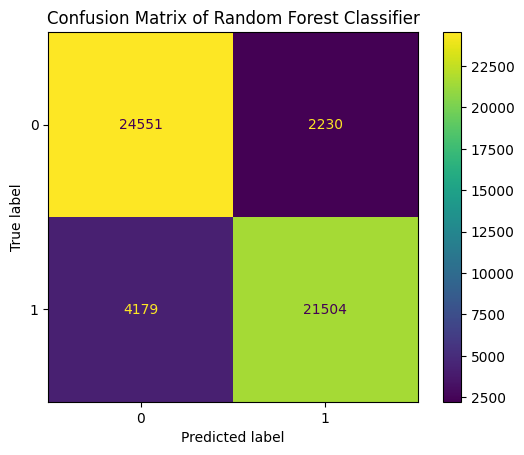

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Random forest classifier, predicting high call week flag
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, max_features='sqrt', class_weight='balanced')

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate Random Forest Classifier
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Step 5: Visualize classification results using confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [49]:
X.head()

,City,Facility,Flag_BarrierOpened,Region,Population_Dens,DistanceTravelled_5,cars_per_region,cars_per_region_1000,ConversationTime_Seconds,WaitTime_Seconds,...,IsBusyHour,LaggedBusyHour,CallDurationRatio,PopulationCarRatio,BarrierOpenedCount,BarrierOpened_DayOfWeek_Interaction,BarrierOpened_HourOfDay_Interaction,Day,DayOfWeek,Hour
0,11,58,0,3,529,5956,1452605,553,10.933,25.703,...,1,1.0,2.350741,0.000364,6155,0,0,6,0,16
1,5,33,1,3,529,5956,1452605,553,4.193,25.697,...,1,1.0,6.127086,0.000364,3839,1,16,11,1,16
2,5,30,0,3,529,5956,1452605,553,8.287,25.696,...,1,1.0,3.100386,0.000364,2650,0,0,19,6,16
3,21,74,0,3,529,5956,1452605,553,15.000,25.694,...,1,1.0,1.712819,0.000364,534,0,0,24,1,14
4,30,89,1,3,529,5956,1452605,553,1.920,25.694,...,1,1.0,13.375325,0.000364,572,0,15,5,0,15


In [50]:

# Reintroduce DateTime column to X from the original dataset f_df
X['DateTime'] = f_df['DateTime']

--- Training Set Evaluation ---
Accuracy: 0.8798688612082686
Precision: 0.9088435087127126
Recall: 0.8387228657646257
F1 Score: 0.8723764010246337
ROC-AUC: 0.8790250003368516
              precision    recall  f1-score   support

           0       0.86      0.92      0.89    107124
           1       0.91      0.84      0.87    102730

    accuracy                           0.88    209854
   macro avg       0.88      0.88      0.88    209854
weighted avg       0.88      0.88      0.88    209854



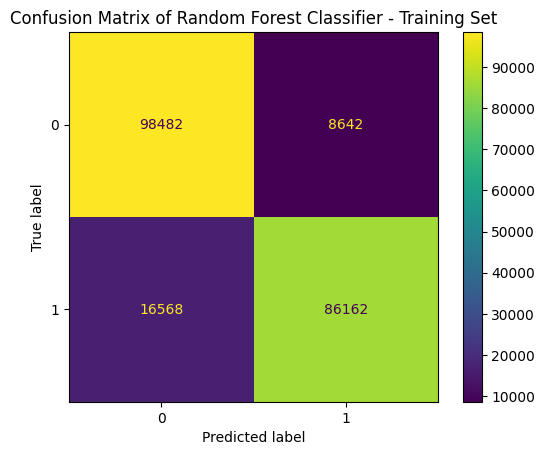

--- Test Set Evaluation ---
Accuracy: 0.8778400426959438
Precision: 0.9060419651133396
Recall: 0.8372853638593623
F1 Score: 0.8703077888176134
ROC-AUC: 0.8770086876800266
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     26781
           1       0.91      0.84      0.87     25683

    accuracy                           0.88     52464
   macro avg       0.88      0.88      0.88     52464
weighted avg       0.88      0.88      0.88     52464



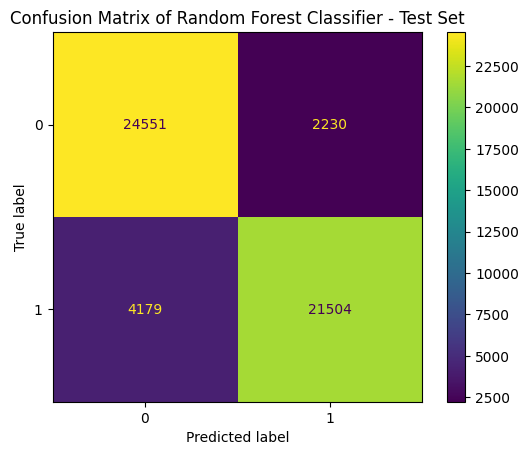

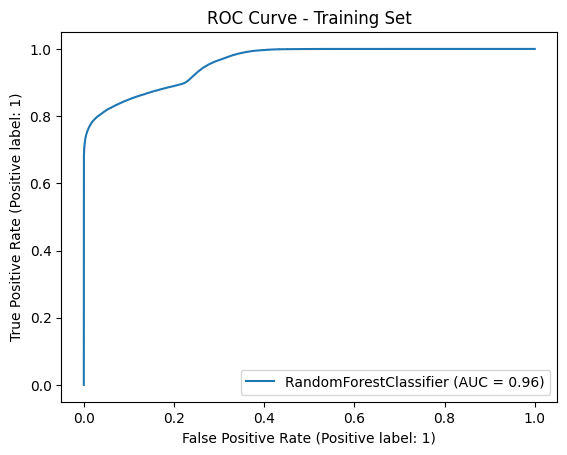

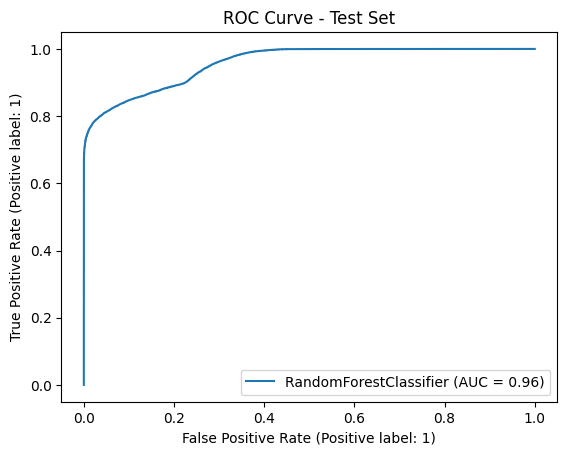

In [51]:
# Random forest classifier, predicting high call week flag
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from xgboost import XGBClassifier


# Random forest classifier, predicting high call week flag
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, max_features='sqrt', class_weight='balanced')

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (excluding DateTime column)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['DateTime']))
X_test_scaled = scaler.transform(X_test.drop(columns=['DateTime']))

# Train the model
model.fit(X_train_scaled, y_train)

#  Evaluate Random Forest Classifier on Training Set
y_train_pred = model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

print('--- Training Set Evaluation ---')
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')
print(f'ROC-AUC: {train_roc_auc}')
print(classification_report(y_train, y_train_pred))

# Confusion Matrix for Training Set
ConfusionMatrixDisplay.from_estimator(model, X_train_scaled, y_train)
plt.title('Confusion Matrix of Random Forest Classifier - Training Set')
plt.show()

# Step 5: Evaluate Random Forest Classifier on Test Set
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('--- Test Set Evaluation ---')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(classification_report(y_test, y_pred))

# Confusion Matrix for Test Set
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Confusion Matrix of Random Forest Classifier - Test Set')
plt.show()

# Step 6: ROC Curve for Train and Test Sets
RocCurveDisplay.from_estimator(model, X_train_scaled, y_train)
plt.title('ROC Curve - Training Set')
plt.show()

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('ROC Curve - Test Set')
plt.show()



Logistic Regression - Accuracy: 0.8138914303141201
Logistic Regression - Precision: 0.7849089021727458
Logistic Regression - Recall: 0.8537943386676011
Logistic Regression - F1 Score: 0.8179037672510258
Logistic Regression - ROC-AUC: 0.8147094242906731


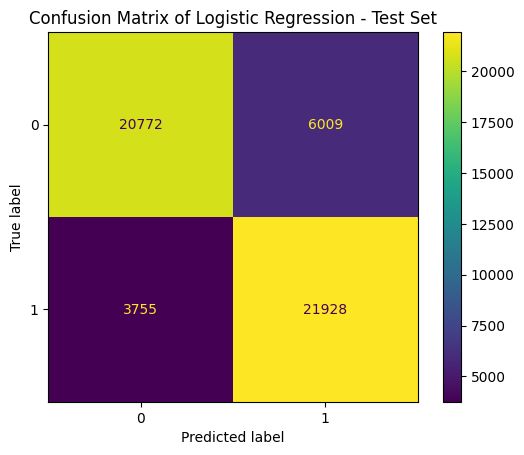

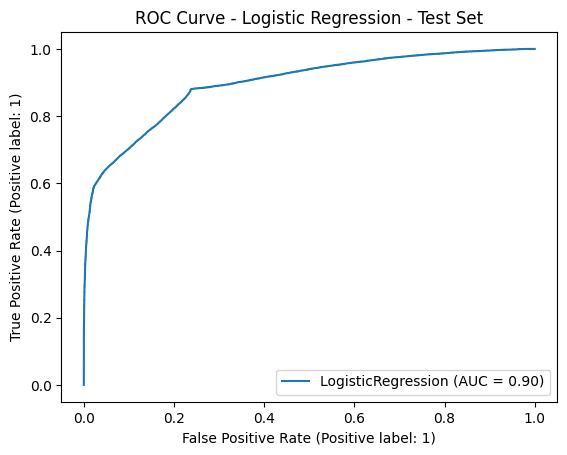

In [52]:
# Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train_scaled, y_train)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (excluding DateTime column)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['DateTime']))
X_test_scaled = scaler.transform(X_test.drop(columns=['DateTime']))

# train 
model.fit(X_train_scaled, y_train)
# Combine historical test predictions for continuity
combined_dates = pd.to_datetime(X_test['DateTime'])
combined_predictions = y_pred
combined_actual = y_test

# Aggregate weekly counts for historical data
combined_df = pd.DataFrame({'Date': combined_dates, 'Predicted': combined_predictions, 'Actual': combined_actual})
combined_df.set_index('Date', inplace=True)

# Resample to weekly data for clearer trend analysis
weekly_agg = combined_df.resample('W').sum()
# Evaluate Logistic Regression Model
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, y_pred_log_reg)

print(f'Logistic Regression - Accuracy: {log_reg_accuracy}')
print(f'Logistic Regression - Precision: {log_reg_precision}')
print(f'Logistic Regression - Recall: {log_reg_recall}')
print(f'Logistic Regression - F1 Score: {log_reg_f1}')
print(f'Logistic Regression - ROC-AUC: {log_reg_roc_auc}')

# Confusion Matrix for Logistic Regression Model
ConfusionMatrixDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)
plt.title('Confusion Matrix of Logistic Regression - Test Set')
plt.show()

# ROC Curve for Logistic Regression Model
RocCurveDisplay.from_estimator(log_reg_model, X_test_scaled, y_test)
plt.title('ROC Curve - Logistic Regression - Test Set')
plt.show()



In [53]:
#addiotnal feature engineering
# categorizing Hour of Day into business and non -business hours
# business hours are from 9am to 5pm
# non-business hours are from 5pm to 9am
X['BusinessHour'] = X['Hour_of_Day'].apply(lambda x: 1 if 9 <= x <= 17 else 0)

# adding morning, afternoong, evening & night

X['Morning'] = X['Hour_of_Day'].apply(lambda x: 1 if 5 <= x <= 11 else 0)
X['Afternoon'] = X['Hour_of_Day'].apply(lambda x: 1 if 12 <= x <= 17 else 0)
X['Evening'] = X['Hour_of_Day'].apply(lambda x: 1 if 18 <= x <= 23 else 0)
X['Night'] = X['Hour_of_Day'].apply(lambda x: 1 if 0 <= x <= 4 else 0)

# Adding a 7-day rolling average for key numerical features to capture general trends
# Assuming CallDurationRatio and BarrierOpenedCount are present in the dataset
X['RollingMean_CallDurationRatio'] = X['CallDurationRatio'].rolling(window=7, min_periods=1).mean()
X['RollingMean_BarrierOpenedCount'] = X['BarrierOpenedCount'].rolling(window=7, min_periods=1).mean()
